In [1]:
import pandas as pd
import numpy as np
# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NASDAQ_100.csv')

In [3]:
df.sample(5)

date        open        high         low       close      volume  \
9219  2022-04-22  13714.6299  13769.4004  13342.7900  13356.8701  4475090000   
8662  2020-02-06   9395.6904   9448.7197   9357.8604   9445.9199  2313860000   
2274  1994-09-22    393.7100    396.2600    391.5300    393.5500   308590000   
1006  1989-09-18    221.9600    222.0100    220.6150    221.7500   210100000   
6257  2010-07-19   1807.9900   1822.7100   1794.5601   1819.2800  1735090000   

      change_percent   avg_vol_20d  
9219           -2.65  4.983266e+09  
8662            0.84  2.461974e+09  
2274           -0.04  2.877530e+08  
1006           -0.09  2.544770e+08  
6257            0.88  2.144728e+09

In [4]:
df.describe()

open          high           low         close        volume  \
count   9555.000000   9555.000000   9555.000000   9555.000000  9.555000e+03   
mean    3029.967883   3055.108198   3003.451545   3030.673734  1.638010e+09   
std     3701.839622   3730.298618   3671.173567   3702.635748  1.321559e+09   
min      107.160000    108.270000    106.750000    107.160000  0.000000e+00   
25%      436.845000    437.535000    431.625000    437.015000  4.755350e+08   
50%     1658.470000   1676.930100   1644.400000   1661.020000  1.669940e+09   
75%     3804.030050   3841.025000   3773.494950   3804.360100  2.078915e+09   
max    16644.769500  16764.859400  16523.830100  16573.339800  1.162119e+10   

       change_percent   avg_vol_20d  
count     9554.000000  9.536000e+03  
mean         0.065104  1.636688e+09  
std          1.652152  1.278652e+09  
min        -15.080000  1.248480e+08  
25%         -0.670000  4.794888e+08  
50%          0.120000  1.740558e+09  
75%          0.840000  2.046406e+09  
max         18.770000  8.052748e+09

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9555 entries, 0 to 9554
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            9555 non-null   object 
 1   open            9555 non-null   float64
 2   high            9555 non-null   float64
 3   low             9555 non-null   float64
 4   close           9555 non-null   float64
 5   volume          9555 non-null   int64  
 6   change_percent  9554 non-null   float64
 7   avg_vol_20d     9536 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 597.3+ KB


## Feature Creation

### Date columns


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Creating a daily middle column
df['daily_middle'] = (df['high']+df['low'])/2
df.sample(5)

date       open       high        low      close      volume  \
2907 1997-03-25   802.3700   815.2600   799.3300   807.1900   544050000   
8467 2019-04-30  7769.2998  7792.3198  7726.0698  7781.4600  2131850000   
5763 2008-07-31  1835.3500  1874.5400  1832.7000  1849.1500  2316510000   
2733 1996-07-17   614.2500   634.4200   614.2500   631.3000   701140000   
6730 2012-06-01  2510.8201  2510.8201  2458.7300  2458.8301  1966370000   

      change_percent   avg_vol_20d  daily_middle  
2907            0.60  6.040165e+08     807.29500  
8467           -0.73  2.066168e+09    7759.19480  
5763           -0.20  2.282114e+09    1853.62000  
2733            2.78  5.636530e+08     624.33500  
6730           -2.62  1.826688e+09    2484.77505

In [8]:
# Extracting time fields from the date
df['dayNumber'] = df['date'].dt.day
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['is_quarter_end'] = np.where((df['date'].dt.month)%3==0,1,0)

### Moving Averages

In [9]:
# Creating moving averages for 5, 10 and 20 day periods
df['Moving5DayClose'] = df.rolling(window=5)['close'].mean()
df['Moving10DayClose'] = df.rolling(window=10)['close'].mean()
df['Moving20DayClose'] = df.rolling(window=20)['close'].mean()
df.head()

date     open     high      low    close     volume  change_percent  \
0 1985-09-25  111.175  111.175  111.175  111.175          0             NaN   
1 1985-09-26  110.640  110.640  110.640  110.640          0           -0.48   
2 1985-09-27  110.640  110.640  110.640  110.640          0            0.00   
3 1985-09-30  110.620  110.620  110.620  110.620          0           -0.02   
4 1985-10-01  110.620  112.160  110.565  112.140  153160000            1.37   

   avg_vol_20d  daily_middle  dayNumber        day      month  year  \
0          NaN      111.1750         25  Wednesday  September  1985   
1          NaN      110.6400         26   Thursday  September  1985   
2          NaN      110.6400         27     Friday  September  1985   
3          NaN      110.6200         30     Monday  September  1985   
4          NaN      111.3625          1    Tuesday    October  1985   

   is_quarter_end  Moving5DayClose  Moving10DayClose  Moving20DayClose  
0               1              NaN               NaN               NaN  
1               1              NaN               NaN               NaN  
2               1              NaN               NaN               NaN  
3               1              NaN               NaN               NaN  
4               0          111.043               NaN               NaN

In [10]:
df.head(20)

date     open     high      low    close     volume  change_percent  \
0  1985-09-25  111.175  111.175  111.175  111.175          0             NaN   
1  1985-09-26  110.640  110.640  110.640  110.640          0           -0.48   
2  1985-09-27  110.640  110.640  110.640  110.640          0            0.00   
3  1985-09-30  110.620  110.620  110.620  110.620          0           -0.02   
4  1985-10-01  110.620  112.160  110.565  112.140  153160000            1.37   
5  1985-10-02  112.140  112.540  110.780  110.825  164640000           -1.17   
6  1985-10-03  110.840  111.185  110.120  110.870  147300000            0.04   
7  1985-10-04  110.870  110.870  109.855  110.075  147900000           -0.72   
8  1985-10-07  110.075  110.135  108.175  108.200  128640000           -1.70   
9  1985-10-08  108.200  108.270  106.750  107.160  144100000           -0.96   
10 1985-10-09  107.160  108.990  107.115  108.630  156200000            1.37   
11 1985-10-10  108.630  109.510  107.810  109.435  154840000            0.74   
12 1985-10-11  109.435  111.120  109.425  111.050  158220000            1.48   
13 1985-10-14  111.050  113.270  111.050  113.185  123120000            1.92   
14 1985-10-15  113.185  113.980  112.790  113.380  171360000            0.17   
15 1985-10-16  113.380  114.340  113.200  114.315  175120000            0.82   
16 1985-10-17  114.315  115.340  114.315  114.740  190940000            0.37   
17 1985-10-18  114.740  114.965  113.830  114.320  180880000           -0.37   
18 1985-10-21  114.320  114.455  113.650  113.680  142800000           -0.56   
19 1985-10-22  113.800  114.890  113.425  114.440  157740000            0.67   

    avg_vol_20d  daily_middle  dayNumber        day      month  year  \
0           NaN      111.1750         25  Wednesday  September  1985   
1           NaN      110.6400         26   Thursday  September  1985   
2           NaN      110.6400         27     Friday  September  1985   
3           NaN      110.6200         30     Monday  September  1985   
4           NaN      111.3625          1    Tuesday    October  1985   
5           NaN      111.6600          2  Wednesday    October  1985   
6           NaN      110.6525          3   Thursday    October  1985   
7           NaN      110.3625          4     Friday    October  1985   
8           NaN      109.1550          7     Monday    October  1985   
9           NaN      107.5100          8    Tuesday    October  1985   
10          NaN      108.0525          9  Wednesday    October  1985   
11          NaN      108.6600         10   Thursday    October  1985   
12          NaN      110.2725         11     Friday    October  1985   
13          NaN      112.1600         14     Monday    October  1985   
14          NaN      113.3850         15    Tuesday    October  1985   
15          NaN      113.7700         16  Wednesday    October  1985   
16          NaN      114.8275         17   Thursday    October  1985   
17          NaN      114.3975         18     Friday    October  1985   
18          NaN      114.0525         21     Monday    October  1985   
19  124848000.0      114.1575         22    Tuesday    October  1985   

    is_quarter_end  Moving5DayClose  Moving10DayClose  Moving20DayClose  
0                1              NaN               NaN               NaN  
1                1              NaN               NaN               NaN  
2                1              NaN               NaN               NaN  
3                1              NaN               NaN               NaN  
4                0          111.043               NaN               NaN  
5                0          110.973               NaN               NaN  
6                0          111.019               NaN               NaN  
7                0          110.906               NaN               NaN  
8                0          110.422               NaN               NaN  
9                0          109.426          110.2345               NaN  
1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9555 entries, 0 to 9554
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              9555 non-null   datetime64[ns]
 1   open              9555 non-null   float64       
 2   high              9555 non-null   float64       
 3   low               9555 non-null   float64       
 4   close             9555 non-null   float64       
 5   volume            9555 non-null   int64         
 6   change_percent    9554 non-null   float64       
 7   avg_vol_20d       9536 non-null   float64       
 8   daily_middle      9555 non-null   float64       
 9   dayNumber         9555 non-null   int32         
 10  day               9555 non-null   object        
 11  month             9555 non-null   object        
 12  year              9555 non-null   int32         
 13  is_quarter_end    9555 non-null   int32         
 14  Moving5DayClose   9551 n

### Setting the index

In [12]:
df = df.set_index('date')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9555 entries, 1985-09-25 to 2023-08-23
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              9555 non-null   float64
 1   high              9555 non-null   float64
 2   low               9555 non-null   float64
 3   close             9555 non-null   float64
 4   volume            9555 non-null   int64  
 5   change_percent    9554 non-null   float64
 6   avg_vol_20d       9536 non-null   float64
 7   daily_middle      9555 non-null   float64
 8   dayNumber         9555 non-null   int32  
 9   day               9555 non-null   object 
 10  month             9555 non-null   object 
 11  year              9555 non-null   int32  
 12  is_quarter_end    9555 non-null   int32  
 13  Moving5DayClose   9551 non-null   float64
 14  Moving10DayClose  9546 non-null   float64
 15  Moving20DayClose  9536 non-null   float64
dtypes: float64(10), int32(3)

In [14]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                        
1985-09-25  111.175  111.175  111.175  111.175          0             NaN   
1985-09-26  110.640  110.640  110.640  110.640          0           -0.48   
1985-09-27  110.640  110.640  110.640  110.640          0            0.00   
1985-09-30  110.620  110.620  110.620  110.620          0           -0.02   
1985-10-01  110.620  112.160  110.565  112.140  153160000            1.37   

            avg_vol_20d  daily_middle  dayNumber        day      month  year  \
date                                                                           
1985-09-25          NaN      111.1750         25  Wednesday  September  1985   
1985-09-26          NaN      110.6400         26   Thursday  September  1985   
1985-09-27          NaN      110.6400         27     Friday  September  1985   
1985-09-30          NaN      110.6200         30     Monday  September  1985   
1985-10-01          NaN      111.3625          1    Tuesday    October  1985   

            is_quarter_end  Moving5DayClose  Moving10DayClose  \
date                                                            
1985-09-25               1              NaN               NaN   
1985-09-26               1              NaN               NaN   
1985-09-27               1              NaN               NaN   
1985-09-30               1              NaN               NaN   
1985-10-01               0          111.043               NaN   

            Moving20DayClose  
date                          
1985-09-25               NaN  
1985-09-26               NaN  
1985-09-27               NaN  
1985-09-30               NaN  
1985-10-01               NaN

   ### All time and Relative Maximums

In [15]:
# Creating an all time high column using an expanding window from the first observation
df['all_time_high'] = df['high'].expanding(min_periods=1).max()

I will also add yearly maximum, minimum and average columns that only use observations from the past so they do cause any data leakage when trying to produce a predictive model. The function iterates through the index column, which contains the date, and finds the maximum and minimum values from the year in question only.

In [16]:
# Creating columns to store the yearly maximum and minimum
df['yearly_max_to_date'] = 0
df['yearly_min_to_date'] = float('inf')
df['yearly_avg_to_date'] = 0.0

# Iterating through the DataFrame
for date in df.index:
    year = date.year
    past_data = df[df.index.year == year]
    past_data = past_data[past_data.index <= date]
    max_val = past_data['high'].max()
    min_val = past_data['low'].min()
    avg_to_date = past_data['daily_middle'].mean()
    
    # Update the 'yearly_max' and 'yearly_min' columns
    df.at[date, 'yearly_max_to_date'] = max_val
    df.at[date, 'yearly_min_to_date'] = min_val
    df.at[date, 'yearly_avg_to_date'] = avg_to_date

In [17]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                        
1985-09-25  111.175  111.175  111.175  111.175          0             NaN   
1985-09-26  110.640  110.640  110.640  110.640          0           -0.48   
1985-09-27  110.640  110.640  110.640  110.640          0            0.00   
1985-09-30  110.620  110.620  110.620  110.620          0           -0.02   
1985-10-01  110.620  112.160  110.565  112.140  153160000            1.37   

            avg_vol_20d  daily_middle  dayNumber        day      month  year  \
date                                                                           
1985-09-25          NaN      111.1750         25  Wednesday  September  1985   
1985-09-26          NaN      110.6400         26   Thursday  September  1985   
1985-09-27          NaN      110.6400         27     Friday  September  1985   
1985-09-30          NaN      110.6200         30     Monday  September  1985   
1985-10-01          NaN      111.3625          1    Tuesday    October  1985   

            is_quarter_end  Moving5DayClose  Moving10DayClose  \
date                                                            
1985-09-25               1              NaN               NaN   
1985-09-26               1              NaN               NaN   
1985-09-27               1              NaN               NaN   
1985-09-30               1              NaN               NaN   
1985-10-01               0          111.043               NaN   

            Moving20DayClose  all_time_high  yearly_max_to_date  \
date                                                              
1985-09-25               NaN        111.175             111.175   
1985-09-26               NaN        111.175             111.175   
1985-09-27               NaN        111.175             111.175   
1985-09-30               NaN        111.175             111.175   
1985-10-01               NaN        112.160             112.160   

            yearly_min_to_date  yearly_avg_to_date  
date                                                
1985-09-25             111.175          111.175000  
1985-09-26             110.640          110.907500  
1985-09-27             110.640          110.818333  
1985-09-30             110.620          110.768750  
1985-10-01             110.565          110.887500

In [18]:
# Creating columns to store the monthly maximum and minimum
df['monthly_max_to_date'] = 0
df['monthly_min_to_date'] = float('inf')
df['monthly_avg_to_date'] = 0.0

# Iterating through the DataFrame
for date in df.index:
    year = date.year
    month = date.month
    past_data = df[(df.index.year == year) & (df.index.month == month)]
    past_data = past_data[past_data.index <= date]
    max_val = past_data['high'].max()
    min_val = past_data['low'].min()
    avg_to_date = past_data['daily_middle'].mean()
    
    # Update the 'yearly_max' and 'yearly_min' columns
    df.at[date, 'monthly_max_to_date'] = max_val
    df.at[date, 'monthly_min_to_date'] = min_val
    df.at[date, 'monthly_avg_to_date'] = avg_to_date

In [19]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                        
1985-09-25  111.175  111.175  111.175  111.175          0             NaN   
1985-09-26  110.640  110.640  110.640  110.640          0           -0.48   
1985-09-27  110.640  110.640  110.640  110.640          0            0.00   
1985-09-30  110.620  110.620  110.620  110.620          0           -0.02   
1985-10-01  110.620  112.160  110.565  112.140  153160000            1.37   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-09-25          NaN      111.1750         25  Wednesday  ...   
1985-09-26          NaN      110.6400         26   Thursday  ...   
1985-09-27          NaN      110.6400         27     Friday  ...   
1985-09-30          NaN      110.6200         30     Monday  ...   
1985-10-01          NaN      111.3625          1    Tuesday  ...   

           Moving5DayClose  Moving10DayClose  Moving20DayClose  all_time_high  \
date                                                                            
1985-09-25             NaN               NaN               NaN        111.175   
1985-09-26             NaN               NaN               NaN        111.175   
1985-09-27             NaN               NaN               NaN        111.175   
1985-09-30             NaN               NaN               NaN        111.175   
1985-10-01         111.043               NaN               NaN        112.160   

            yearly_max_to_date  yearly_min_to_date  yearly_avg_to_date  \
date                                                                     
1985-09-25             111.175             111.175          111.175000   
1985-09-26             111.175             110.640          110.907500   
1985-09-27             111.175             110.640          110.818333   
1985-09-30             111.175             110.620          110.768750   
1985-10-01             112.160             110.565          110.887500   

            monthly_max_to_date  monthly_min_to_date  monthly_avg_to_date  
date                                                                       
1985-09-25              111.175              111.175           111.175000  
1985-09-26              111.175              110.640           110.907500  
1985-09-27              111.175              110.640           110.818333  
1985-09-30              111.175              110.620           110.768750  
1985-10-01              112.160              110.565           111.362500  

[5 rows x 23 columns]

In [20]:
df.isna().sum()

open                    0
high                    0
low                     0
close                   0
volume                  0
change_percent          1
avg_vol_20d            19
daily_middle            0
dayNumber               0
day                     0
month                   0
year                    0
is_quarter_end          0
Moving5DayClose         4
Moving10DayClose        9
Moving20DayClose       19
all_time_high           0
yearly_max_to_date      0
yearly_min_to_date      0
yearly_avg_to_date      0
monthly_max_to_date     0
monthly_min_to_date     0
monthly_avg_to_date     0
dtype: int64

In [21]:
#Dropping NaN values
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9536 entries, 1985-10-22 to 2023-08-23
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   open                 9536 non-null   float64
 1   high                 9536 non-null   float64
 2   low                  9536 non-null   float64
 3   close                9536 non-null   float64
 4   volume               9536 non-null   int64  
 5   change_percent       9536 non-null   float64
 6   avg_vol_20d          9536 non-null   float64
 7   daily_middle         9536 non-null   float64
 8   dayNumber            9536 non-null   int32  
 9   day                  9536 non-null   object 
 10  month                9536 non-null   object 
 11  year                 9536 non-null   int32  
 12  is_quarter_end       9536 non-null   int32  
 13  Moving5DayClose      9536 non-null   float64
 14  Moving10DayClose     9536 non-null   float64
 15  Moving20DayClose    

In [23]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                        
1985-10-22  113.800  114.890  113.425  114.440  157740000            0.67   
1985-10-23  114.440  115.525  114.440  115.065  202200000            0.55   
1985-10-24  115.065  116.105  115.065  115.485  190860000            0.37   
1985-10-25  115.485  115.545  113.740  113.910  165840000           -1.36   
1985-10-28  113.910  113.910  113.205  113.820  131460000           -0.08   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-22  124848000.0      114.1575         22    Tuesday  ...   
1985-10-23  134958000.0      114.9825         23  Wednesday  ...   
1985-10-24  144501000.0      115.5850         24   Thursday  ...   
1985-10-25  152793000.0      114.6425         25     Friday  ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   

           Moving5DayClose  Moving10DayClose  Moving20DayClose  all_time_high  \
date                                                                            
1985-10-22         114.299          112.7175         111.47600        115.340   
1985-10-23         114.449          113.3610         111.67050        115.525   
1985-10-24         114.598          113.9660         111.91275        116.105   
1985-10-25         114.516          114.2520         112.07625        116.105   
1985-10-28         114.544          114.3155         112.23625        116.105   

            yearly_max_to_date  yearly_min_to_date  yearly_avg_to_date  \
date                                                                     
1985-10-22             115.340              106.75          111.375625   
1985-10-23             115.525              106.75          111.547381   
1985-10-24             116.105              106.75          111.730909   
1985-10-25             116.105              106.75          111.857500   
1985-10-28             116.105              106.75          111.928333   

            monthly_max_to_date  monthly_min_to_date  monthly_avg_to_date  
date                                                                       
1985-10-22              115.340               106.75           111.527344  
1985-10-23              115.525               106.75           111.730588  
1985-10-24              116.105               106.75           111.944722  
1985-10-25              116.105               106.75           112.086711  
1985-10-28              116.105               106.75           112.160250  

[5 rows x 23 columns]

In [24]:
df.describe()

open          high           low         close        volume  \
count   9536.000000   9536.000000   9536.000000   9536.000000  9.536000e+03   
mean    3035.783462   3060.972591   3009.215290   3036.490399  1.641028e+09   
std     3703.230083   3731.696524   3672.555397   3704.026637  1.321138e+09   
min      113.800000    113.910000    113.205000    113.820000  3.174000e+07   
25%      447.000000    448.745000    442.705000    447.112500  4.804525e+08   
50%     1664.424950   1681.530000   1648.200000   1664.445000  1.672260e+09   
75%     3809.985100   3858.015075   3783.377525   3808.612500  2.080365e+09   
max    16644.769500  16764.859400  16523.830100  16573.339800  1.162119e+10   

       change_percent   avg_vol_20d  daily_middle    dayNumber         year  \
count     9536.000000  9.536000e+03   9536.000000  9536.000000  9536.000000   
mean         0.064985  1.636688e+09   3035.093940    15.738674  2004.205327   
std          1.653166  1.278652e+09   3702.038902     8.748366    10.932265   
min        -15.080000  1.248480e+08    113.557500     1.000000  1985.000000   
25%         -0.670000  4.794888e+08    445.746250     8.000000  1995.000000   
50%          0.120000  1.740558e+09   1664.617475    16.000000  2004.000000   
75%          0.840000  2.046406e+09   3813.409962    23.000000  2014.000000   
max         18.770000  8.052748e+09  16574.844750    31.000000  2023.000000   

       ...  Moving5DayClose  Moving10DayClose  Moving20DayClose  \
count  ...      9536.000000       9536.000000       9536.000000   
mean   ...      3033.368140       3029.494406       3021.608015   
std    ...      3699.671109       3694.486192       3683.655657   
min    ...       114.299000        112.717500        111.476000   
25%    ...       446.061500        447.290250        442.918000   
50%    ...      1663.491010       1666.842505       1663.230005   
75%    ...      3804.009520       3799.953785       3802.782121   
max    ...     16459.269940      16355.247960      16253.801550   

       all_time_high  yearly_max_to_date  yearly_min_to_date  \
count    9536.000000         9536.000000         9536.000000   
mean     4349.225084         3305.125117         2558.323115   
std      4117.448959         4057.737950         3096.020532   
min       115.340000          115.340000          106.750000   
25%       459.967500          459.967500          394.590000   
50%      4816.350100         1780.830000         1446.770000   
75%      4816.350100         4303.167450         3414.110100   
max     16764.859400        16764.859400        16306.639600   

       yearly_avg_to_date  monthly_max_to_date  monthly_min_to_date  \
count         9536.000000          9536.000000          9536.000000   
mean          2945.739257          3124.185995          2920.700349   
std           3571.435484          3809.278326          3572.488420   
min            111.375625           115.340000           106.750000   
25%            424.609671           450.900000           429.050000   
50%           1688.072083          1714.280000          1585.560100   
75%           3776.905553          3957.475100          3610.270000   
max          16405.390100         16764.859400         16306.639600   

       monthly_avg_to_date  
count          9536.000000  
mean           3028.808135  
std            3695.463309  
min             111.527344  
25%             442.248197  
50%            1665.167016  
75%            3788.045602  
max           16405.390100  

[8 rows x 21 columns]

In [25]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                        
1985-10-22  113.800  114.890  113.425  114.440  157740000            0.67   
1985-10-23  114.440  115.525  114.440  115.065  202200000            0.55   
1985-10-24  115.065  116.105  115.065  115.485  190860000            0.37   
1985-10-25  115.485  115.545  113.740  113.910  165840000           -1.36   
1985-10-28  113.910  113.910  113.205  113.820  131460000           -0.08   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-22  124848000.0      114.1575         22    Tuesday  ...   
1985-10-23  134958000.0      114.9825         23  Wednesday  ...   
1985-10-24  144501000.0      115.5850         24   Thursday  ...   
1985-10-25  152793000.0      114.6425         25     Friday  ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   

           Moving5DayClose  Moving10DayClose  Moving20DayClose  all_time_high  \
date                                                                            
1985-10-22         114.299          112.7175         111.47600        115.340   
1985-10-23         114.449          113.3610         111.67050        115.525   
1985-10-24         114.598          113.9660         111.91275        116.105   
1985-10-25         114.516          114.2520         112.07625        116.105   
1985-10-28         114.544          114.3155         112.23625        116.105   

            yearly_max_to_date  yearly_min_to_date  yearly_avg_to_date  \
date                                                                     
1985-10-22             115.340              106.75          111.375625   
1985-10-23             115.525              106.75          111.547381   
1985-10-24             116.105              106.75          111.730909   
1985-10-25             116.105              106.75          111.857500   
1985-10-28             116.105              106.75          111.928333   

            monthly_max_to_date  monthly_min_to_date  monthly_avg_to_date  
date                                                                       
1985-10-22              115.340               106.75           111.527344  
1985-10-23              115.525               106.75           111.730588  
1985-10-24              116.105               106.75           111.944722  
1985-10-25              116.105               106.75           112.086711  
1985-10-28              116.105               106.75           112.160250  

[5 rows x 23 columns]

Creating a cumulative change column that calculate the cumulative increase or decrease before the price changes direction. I've also added a column that counts the number of days the price has been moving in the same direction.

### Cumulative Change and Runs

In [26]:
# Creating a column to track cumulative changes
df['cumulativechange'] = 0

# Initialize variables to track cumulative changes and runs
cumulative_change = 0
prev_polarity = None  # To keep track of the polarity (positive or negative)
run = 0  # To track the number of days in the same direction

# Iterate through the DataFrame and calculate cumulative changes and runs
for i in range(1, len(df)):
    change = df['close'].iloc[i] - df['open'].iloc[i]

    # Determine the polarity (positive or negative)
    polarity = 'positive' if change >= 0 else 'negative'

    if prev_polarity is None:
        prev_polarity = polarity
    elif polarity == prev_polarity:
        cumulative_change += change
        run += 1
    else:
        cumulative_change = change
        prev_polarity = polarity
        run = 1

    df.at[df.index[i], 'cumulativechange'] = cumulative_change
    df.at[df.index[i], 'run'] = run

In [27]:
df.tail(10)

open        high         low       close      volume  \
date                                                                     
2023-08-10  15217.2900  15366.2900  15072.4902  15128.8398  5299080000   
2023-08-11  15010.5195  15102.5303  14973.6699  15028.0703  4638880000   
2023-08-14  14988.4199  15206.2598  14972.0098  15205.5898  4272020000   
2023-08-15  15172.0801  15192.8799  15014.3604  15037.6504  4473320000   
2023-08-16  15021.6299  15077.0498  14874.0195  14876.4697  6243760000   
2023-08-17  14943.3398  14949.5801  14698.2900  14715.8096  5280180000   
2023-08-18  14589.7100  14744.5703  14557.8301  14694.8398  4801910000   
2023-08-21  14762.0098  14958.8701  14739.3701  14936.6904  4363070000   
2023-08-22  15035.0703  15037.7900  14883.9805  14908.9600  4282430000   
2023-08-23  14947.5996  15188.8633  14947.5752  15178.9238   466651080   

            change_percent   avg_vol_20d  daily_middle  dayNumber        day  \
date                                                                           
2023-08-10            0.18  4.978478e+09   15219.39010         10   Thursday   
2023-08-11           -0.67  4.942077e+09   15038.10010         11     Friday   
2023-08-14            1.18  4.926020e+09   15089.13480         14     Monday   
2023-08-15           -1.10  4.908482e+09   15103.62015         15    Tuesday   
2023-08-16           -1.07  4.965050e+09   14975.53465         16  Wednesday   
2023-08-17           -1.08  4.972658e+09   14823.93505         17   Thursday   
2023-08-18           -0.14  4.950044e+09   14651.20020         18     Friday   
2023-08-21            1.65  4.964044e+09   14849.12010         21     Monday   
2023-08-22           -0.19  4.987542e+09   14960.88525         22    Tuesday   
2023-08-23            1.81  4.794775e+09   15068.21925         23  Wednesday   

            ... Moving20DayClose  all_time_high  yearly_max_to_date  \
date        ...                                                       
2023-08-10  ...     15497.427825     16764.8594          15932.0498   
2023-08-11  ...     15470.551360     16764.8594          15932.0498   
2023-08-14  ...     15445.166835     16764.8594          15932.0498   
2023-08-15  ...     15404.981875     16764.8594          15932.0498   
2023-08-16  ...     15357.487880     16764.8594          15932.0498   
2023-08-17  ...     15319.973870     16764.8594          15932.0498   
2023-08-18  ...     15283.432365     16764.8594          15932.0498   
2023-08-21  ...     15257.865910     16764.8594          15932.0498   
2023-08-22  ...     15225.242915     16764.8594          15932.0498   
2023-08-23  ...     15209.226115     16764.8594          15932.0498   

            yearly_min_to_date  yearly_avg_to_date  monthly_max_to_date  \
date                                                                      
2023-08-10          10696.4199        13404.536766           15748.4297   
2023-08-11          10696.4199        13415.213651           15748.4297   
2023-08-14          10696.4199        13426.083269           15748.4297   
2023-08-15          10696.4199        13436.906087           15748.4297   
2023-08-16          10696.4199        13446.769091           15748.4297   
2023-08-17          10696.4199        13455.540849           15748.4297   
2023-08-18          10696.4199        13463.108313           15748.4297   
2023-08-21          10696.4199        13471.825368           15748.4297   
2023-08-22          10696.4199        13481.131993           15748.4297   
2023-08-23          10696.4199        13490.989677           15748.4297   

            monthly_min_to_date  monthly_avg_to_date  cumulativechange  run  
date                                                                         
2023-08-10           15072.4902         15354.773737         -280.0908  3.0  
2023-08-11           14973.6699         15319.587778           17.5508  1.0  
2023-08-14           14972.0098         15296.542480          234.7207  2.0  
2023-08-15           149

## EDA

### Moving averages

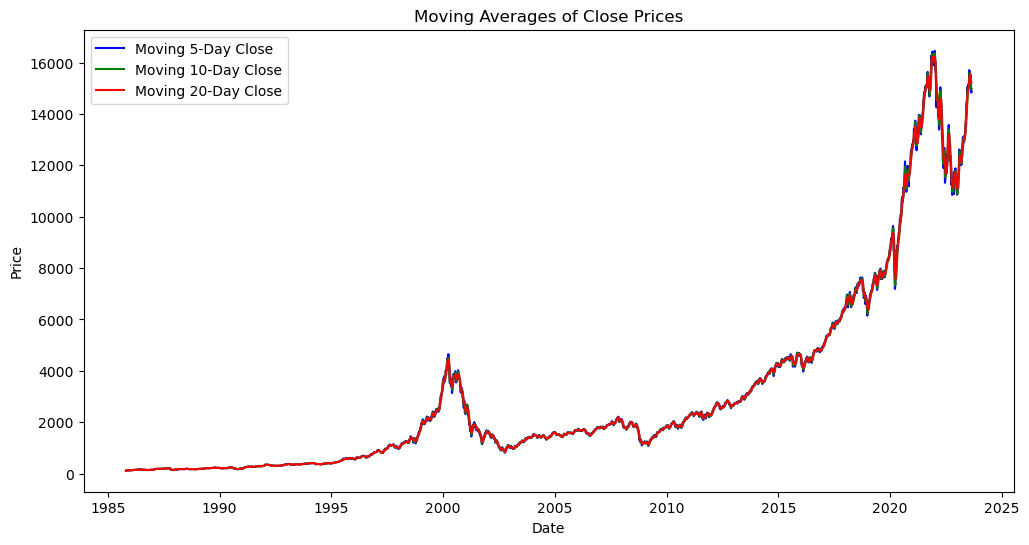

In [28]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with these three columns and 'date' as the index

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Moving5DayClose
ax.plot(df.index, df['Moving5DayClose'], label='Moving 5-Day Close', color='blue')

# Plot Moving10DayClose
ax.plot(df.index, df['Moving10DayClose'], label='Moving 10-Day Close', color='green')

# Plot Moving20DayClose
ax.plot(df.index, df['Moving20DayClose'], label='Moving 20-Day Close', color='red')

# Add labels and a legend
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Moving Averages of Close Prices')
ax.legend()

# Show the plot
plt.show()


As we can see all of the moving averages follow a very similar shape to the daily close/open price. There are some small fluctuations between the 5, 10 and 20 days which can be used to help indicate the general direction of the stock price.

Typically, the 5 day average will be the largest value of the 3 as the price of the stock normally increases, it should contain slightly larger values than the 10 and 20 days, leading to a larger average. Any periods where this isn't true would indicate a decline in stock price.

In [29]:
# Calculate the differences between moving averages
df['DecreasingMA5-10'] = (df['Moving5DayClose'] - df['Moving10DayClose']).apply(lambda x: 1 if x < 0 else 0)
df['DecreasingMA5-20'] = (df['Moving5DayClose'] - df['Moving20DayClose']).apply(lambda x: 1 if x < 0 else 0)
df['DecreasingMA10-20'] = (df['Moving10DayClose'] - df['Moving20DayClose']).apply(lambda x: 1 if x < 0 else 0)


In [30]:
df[['DecreasingMA5-10','DecreasingMA5-20','DecreasingMA10-20']].value_counts()

DecreasingMA5-10  DecreasingMA5-20  DecreasingMA10-20
0                 0                 0                    4271
1                 1                 1                    2354
                  0                 0                     950
0                 1                 1                     724
1                 1                 0                     623
0                 0                 1                     614
Name: count, dtype: int64

In [31]:
df['DecreasingMA5-20'].value_counts()

DecreasingMA5-20
0    5835
1    3701
Name: count, dtype: int64

In [32]:
df['DecreasingMA10-20'].value_counts()

DecreasingMA10-20
0    5844
1    3692
Name: count, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9536 entries, 1985-10-22 to 2023-08-23
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   open                 9536 non-null   float64
 1   high                 9536 non-null   float64
 2   low                  9536 non-null   float64
 3   close                9536 non-null   float64
 4   volume               9536 non-null   int64  
 5   change_percent       9536 non-null   float64
 6   avg_vol_20d          9536 non-null   float64
 7   daily_middle         9536 non-null   float64
 8   dayNumber            9536 non-null   int32  
 9   day                  9536 non-null   object 
 10  month                9536 non-null   object 
 11  year                 9536 non-null   int32  
 12  is_quarter_end       9536 non-null   int32  
 13  Moving5DayClose      9536 non-null   float64
 14  Moving10DayClose     9536 non-null   float64
 15  Moving20DayClose    

### Daily Differences 

In [34]:
# Define the orders for days of the week and months
custom_order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
custom_order_months = [
    'January', 'February', 'March', 'April', 'May',
    'June', 'July', 'August', 'September', 'October',
    'November', 'December'
]

# Convert the 'day' and 'month' columns to categorical data types with custom orders
df['day'] = pd.Categorical(df['day'], categories=custom_order_days, ordered=True)
df['month'] = pd.Categorical(df['month'], categories=custom_order_months, ordered=True)

In [35]:
df.groupby('day').mean(['open', 'close', 'high', 'low'])

open         high          low        close        volume  \
day                                                                           
Monday     3006.796216  3031.176917  2981.466544  3008.536308  1.535296e+09   
Tuesday    3040.698348  3064.744498  3013.360295  3039.578948  1.637500e+09   
Wednesday  3046.273468  3072.828436  3019.821869  3047.101195  1.680054e+09   
Thursday   3047.197497  3074.410851  3020.570941  3049.465550  1.684804e+09   
Friday     3035.842027  3059.527119  3008.834206  3035.751582  1.660318e+09   

           change_percent   avg_vol_20d  daily_middle  dayNumber         year  \
day                                                                             
Monday          -0.000267  1.624617e+09   3006.321730  15.722068  2004.097832   
Tuesday          0.072055  1.637280e+09   3039.052397  15.790900  2004.208078   
Wednesday        0.161074  1.643197e+09   3046.325152  15.770332  2004.239898   
Thursday         0.083974  1.641623e+09   3047.490896  15.592708  2004.246875   
Friday           0.001632  1.635825e+09   3034.180662  15.815320  2004.226653   

           ...  yearly_min_to_date  yearly_avg_to_date  monthly_max_to_date  \
day        ...                                                                
Monday     ...         2525.685395         2915.331296          3093.398507   
Tuesday    ...         2563.058426         2948.841299          3126.009811   
Wednesday  ...         2567.691299         2955.519843          3134.856552   
Thursday   ...         2572.498436         2958.578522          3137.583090   
Friday     ...         2560.380603         2948.291141          3126.933080   

           monthly_min_to_date  monthly_avg_to_date  cumulativechange  \
day                                                                     
Monday             2896.927128          3001.757333          7.163072   
Tuesday            2925.379223          3031.511428          1.732086   
Wednesday          2930.820506          3039.064513          3.265564   
Thursday           2932.147571          3041.221118          8.237377   
Friday             2916.425727          3028.541925          6.531973   

                run  DecreasingMA5-10  DecreasingMA5-20  DecreasingMA10-20  
day                                                                         
Monday     2.143969          0.424680          0.395220           0.387993  
Tuesday    2.053708          0.416155          0.387014           0.385481  
Wednesday  2.049616          0.408696          0.387212           0.394373  
Thursday   2.023438          0.400000          0.384375           0.386458  
Friday     2.070304          0.410283          0.387198           0.381427  

[5 rows x 26 columns]

Looking at the data split by days, it appears that Wednesday is the best day to purchase the stock as the price has the highest average percentage increase across the data range. Monday, on the other hand, appears to be the worst day to purchase the stock as it has a negative average change percentage.

In [36]:
# Drop the first 4 rows
df = df.drop(df.index[:4])
df.head()

open     high      low    close     volume  change_percent  \
date                                                                       
1985-10-28  113.91  113.910  113.205  113.820  131460000           -0.08   
1985-10-29  113.82  115.735  113.805  115.400  163400000            1.39   
1985-10-30  115.40  116.125  115.340  115.770  196040000            0.32   
1985-10-31  115.77  116.110  115.155  115.480  169920000           -0.25   
1985-11-01  115.48  116.775  115.480  116.275  180180000            0.69   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   
1985-10-29  159878000.0      114.7700         29    Tuesday  ...   
1985-10-30  161448000.0      115.7325         30  Wednesday  ...   
1985-10-31  162579000.0      115.6325         31   Thursday  ...   
1985-11-01  164193000.0      116.1275          1     Friday  ...   

           yearly_min_to_date  yearly_avg_to_date  monthly_max_to_date  \
date                                                                     
1985-10-28             106.75          111.928333              116.105   
1985-10-29             106.75          112.042000              116.105   
1985-10-30             106.75          112.183942              116.125   
1985-10-31             106.75          112.311667              116.125   
1985-11-01             106.75          112.447946              116.775   

            monthly_min_to_date  monthly_avg_to_date  cumulativechange  run  \
date                                                                          
1985-10-28               106.75           112.160250            -1.665  2.0   
1985-10-29               106.75           112.284524             1.580  1.0   
1985-10-30               106.75           112.441250             1.950  2.0   
1985-10-31               106.75           112.580000            -0.290  1.0   
1985-11-01               115.48           116.127500             0.795  1.0   

            DecreasingMA5-10  DecreasingMA5-20  DecreasingMA10-20  
date                                                               
1985-10-28                 0                 0                  0  
1985-10-29                 0                 0                  0  
1985-10-30                 0                 0                  0  
1985-10-31                 0                 0                  0  
1985-11-01                 0                 0                  0  

[5 rows x 28 columns]

I am adding weekly minimum and maximum columns using the close price. Although most days will have a higher/lower value it is consistent and realistic to be able to purchase or sell at the close of the day and much less realistic to hit the daily minimum and maximum values.

I may look into daily fluctuations at a later date and combine both approaches for a maximum ROI plan/model.

In [37]:
# Determine the maximum and minimum close prices for each week
df['weekly_max_close'] = (df['close'] == df.groupby(df.index.to_period('W'))['close'].transform('max')).astype(int)
df['weekly_min_close'] = (df['close'] == df.groupby(df.index.to_period('W'))['close'].transform('min')).astype(int)

In [38]:
df.groupby('day')[['weekly_min_close', 'weekly_max_close']].agg('sum')


weekly_min_close  weekly_max_close
day                                          
Monday                  609               404
Tuesday                 396               281
Wednesday               263               292
Thursday                255               348
Friday                  451               650

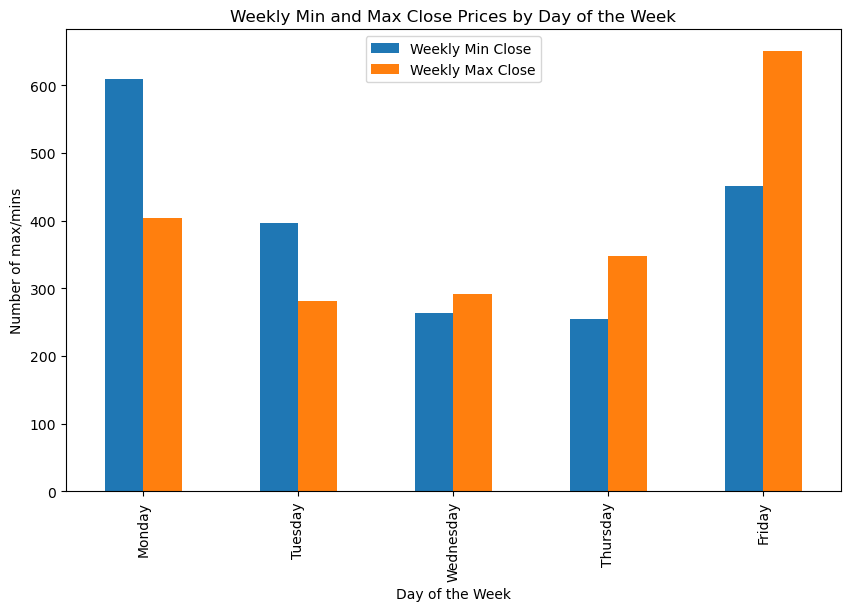

In [39]:
# Group by 'day' and sum the 'weekly_min_close' and 'weekly_max_close'
result = df.groupby('day')[['weekly_min_close', 'weekly_max_close']].agg('sum')

# Plot the results as a bar chart
result.plot(kind='bar', figsize=(10, 6))

# Add labels and a legend
plt.xlabel('Day of the Week')
plt.ylabel('Number of max/mins')
plt.title('Weekly Min and Max Close Prices by Day of the Week')
plt.legend(["Weekly Min Close", "Weekly Max Close"])



# Show the plot
plt.show()

Looking at the counts of weekly maximum and minimum close values, it would make the most sense to consistently purchase the stock on a Monday and sell on a Friday.

In [40]:
df.head(20)

open     high      low    close     volume  change_percent  \
date                                                                        
1985-10-28  113.910  113.910  113.205  113.820  131460000           -0.08   
1985-10-29  113.820  115.735  113.805  115.400  163400000            1.39   
1985-10-30  115.400  116.125  115.340  115.770  196040000            0.32   
1985-10-31  115.770  116.110  115.155  115.480  169920000           -0.25   
1985-11-01  115.480  116.775  115.480  116.275  180180000            0.69   
1985-11-04  116.275  117.075  115.825  116.040  150680000           -0.20   
1985-11-05  116.040  116.565  115.880  116.440  175360000            0.34   
1985-11-06  116.440  117.620  116.440  117.380  187000000            0.81   
1985-11-07  117.380  117.965  117.380  117.620  177280000            0.20   
1985-11-08  117.620  119.390  117.585  119.260  173520000            1.39   
1985-11-11  119.260  120.540  119.180  120.400  160780000            0.96   
1985-11-12  120.390  122.010  120.390  121.820  216600000            1.18   
1985-11-13  121.820  121.915  120.900  121.165  186420000           -0.54   
1985-11-14  121.165  121.915  120.800  121.835  196080000            0.55   
1985-11-15  121.835  123.100  121.790  122.175  190540000            0.28   
1985-11-18  122.175  122.280  121.730  121.955  164420000           -0.18   
1985-11-19  121.955  122.800  121.735  122.570  203600000            0.50   
1985-11-20  122.570  122.795  122.200  122.200  195200000           -0.30   
1985-11-21  122.200  123.805  122.200  123.610  239800000            1.15   
1985-11-22  123.610  124.335  123.445  123.970  208400000            0.29   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   
1985-10-29  159878000.0      114.7700         29    Tuesday  ...   
1985-10-30  161448000.0      115.7325         30  Wednesday  ...   
1985-10-31  162579000.0      115.6325         31   Thursday  ...   
1985-11-01  164193000.0      116.1275          1     Friday  ...   
1985-11-04  165295000.0      116.4500          4     Monday  ...   
1985-11-05  166858000.0      116.2225          5    Tuesday  ...   
1985-11-06  168398000.0      117.0300          6  Wednesday  ...   
1985-11-07  169520000.0      117.6725          7   Thursday  ...   
1985-11-08  170285000.0      118.4875          8     Friday  ...   
1985-11-11  172168000.0      119.8600         11     Monday  ...   
1985-11-12  174430000.0      121.2000         12    Tuesday  ...   
1985-11-13  174995000.0      121.4075         13  Wednesday  ...   
1985-11-14  175252000.0      121.3575         14   Thursday  ...   
1985-11-15  175735000.0      122.4450         15     Friday  ...   
1985-11-18  176816000.0      122.0050         18     Monday  ...   
1985-11-19  179109000.0      122.2675         19    Tuesday  ...   
1985-11-20  178759000.0      122.4975         20  Wednesday  ...   
1985-11-21  181206000.0      123.0025         21   Thursday  ...   
1985-11-22  183334000.0      123.8900         22     Friday  ...   

           monthly_max_to_date  monthly_min_to_date  monthly_avg_to_date  \
date                                                                       
1985-10-28             116.105               106.75           112.160250   
1985-10-29             116.105               106.75           112.284524   
1985-10-30             116.125               106.75           112.441250   
1985-10-31             116.125               106.75           112.580000   
1985-11-01             116.775               115.48           116.127500   
1985-11-04             117.075               115.48           116.288750   
1985-11-05             117.075               115.48           116.266667   
1985-11-06             117.620               115.48           116.457500   
1985-11-07             117.965               115.48           1

### Monthly Differences 

In [41]:
df.groupby('month').mean(['open', 'close', 'high', 'low'])

open         high          low        close        volume  \
month                                                                         
January    2944.516441  2971.045643  2915.458138  2945.903236  1.751765e+09   
February   3031.935518  3059.563224  3004.642091  3033.838217  1.742997e+09   
March      3048.090348  3079.969866  3016.753017  3049.734129  1.772862e+09   
April      3035.158745  3059.827639  3005.733352  3033.216735  1.640728e+09   
May        3055.814194  3082.130688  3029.447471  3057.770912  1.658505e+09   
June       3127.019145  3152.158110  3102.210162  3128.556488  1.733932e+09   
July       3202.702949  3226.413302  3178.519522  3205.927186  1.604123e+09   
August     3211.370796  3234.744974  3188.166856  3212.735953  1.518746e+09   
September  2962.421994  2984.748262  2934.703498  2959.281490  1.564818e+09   
October    2882.813467  2908.895306  2856.082263  2883.576881  1.596576e+09   
November   2948.372860  2970.797372  2924.686293  2949.409744  1.579250e+09   
December   2977.988705  3000.087190  2952.700865  2976.509533  1.540880e+09   

           change_percent   avg_vol_20d  daily_middle  dayNumber         year  \
month                                                                           
January          0.127106  1.582648e+09   2943.251891  16.578745  2004.277849   
February         0.024286  1.782543e+09   3032.102657  14.434066  2004.490385   
March            0.061897  1.775901e+09   3048.361441  15.878752  2004.563025   
April            0.086339  1.665014e+09   3032.780495  15.670918  2004.461735   
May              0.093400  1.678538e+09   3055.789079  15.414695  2004.510585   
June             0.025843  1.667217e+09   3127.184136  15.500615  2004.471095   
July             0.087469  1.665879e+09   3202.466412  16.579800  2004.457606   
August           0.021770  1.593980e+09   3211.455915  15.911483  2004.412679   
September       -0.033758  1.466108e+09   2959.725880  16.086321  2004.010624   
October          0.086939  1.581005e+09   2882.488785  16.040244  2003.860976   
November         0.114111  1.606104e+09   2947.741833  15.025773  2003.543814   
December         0.080311  1.581326e+09   2976.394028  15.586550  2003.481943   

           ...  monthly_max_to_date  monthly_min_to_date  monthly_avg_to_date  \
month      ...                                                                  
January    ...          3035.536097          2814.741510          2933.230665   
February   ...          3128.162371          2919.040866          3037.936991   
March      ...          3153.076035          2912.945066          3040.882140   
April      ...          3122.367333          2913.602687          3025.319353   
May        ...          3159.547613          2949.575376          3056.191334   
June       ...          3209.826319          3014.491402          3119.429040   
July       ...          3263.441762          3078.658483          3173.390852   
August     ...          3293.413077          3110.141773          3205.744479   
September  ...          3073.258245          2881.142999          2978.878053   
October    ...          2968.008997          2749.812075          2868.228978   
November   ...          3022.287265          2826.536517          2932.008772   
December   ...          3061.974395          2878.028429          2975.503821   

           cumulativechange       run  DecreasingMA5-10  DecreasingMA5-20  \
month                                                                       
January           11.477881  2.120359          0.377721          0.329065   
February          16.111034  2.320055          0.377747          0.402473   
March              5.393700  1.863145          0.427371          0.417767   
April             -2.290024  2.070153          0.417092          0.394133   
May                5.030395  2.209215          0.424658          0.402242   
June               5.844681  1.904059          0.435424          0.429274   
July              14.9765

When looking at the monthly averages, September is the worst month to purchase and is the only month with a negative average percentage change. This could be due to a specific financial incident which cause the whole average to be negative, which i will investigate further. 

January and November appear to be the best months to purchase the stock as they have the highest average percentage increase.

In [42]:
september = df[df['month'] == 'September']

september.groupby('year').mean(['open', 'close', 'high', 'low'])

open          high           low         close        volume  \
year                                                                         
1986    141.604762    142.356905    140.141667    141.002381  2.098267e+08   
1987    203.716190    205.143571    202.190952    203.522381  2.945619e+08   
1988    175.194762    176.260238    174.239286    175.526190  2.232495e+08   
1989    223.062250    224.333000    222.232250    223.281500  2.623010e+08   
1990    187.726579    188.958947    184.862895    186.855000  2.199368e+08   
1991    282.978750    284.974750    280.942000    282.985250  3.218650e+08   
1992    312.659762    314.977381    310.454762    313.322857  3.524543e+08   
1993    372.104286    374.636429    369.384762    372.583571  5.501600e+08   
1994    395.459048    397.841905    392.610000    395.263333  2.840290e+08   
1995    594.296500    599.933000    588.421500    594.547000  4.491770e+08   
1996    703.773000    712.047000    699.371500    707.472000  5.323495e+08   
1997   1109.190462   1119.894771   1101.500486   1110.285700  6.990548e+08   
1998   1294.961419   1322.464286   1275.044752   1304.749990  7.563833e+08   
1999   2464.343329   2494.038090   2432.260933   2464.776667  1.015880e+09   
2000   3770.265005   3822.329965   3683.140010   3742.195490  1.736366e+09   
2001   1258.185313   1290.987987   1226.898667   1248.964660  2.055297e+09   
2002    896.790500    910.420000    882.716500    893.171500  1.451484e+09   
2003   1358.919533   1370.913348   1344.868562   1358.219043  1.900818e+09   
2004   1401.324271   1413.449057   1394.552862   1404.812376  1.490242e+09   
2005   1586.582843   1594.780933   1578.351905   1586.548105  1.656670e+09   
2006   1618.855500   1629.332995   1609.051000   1621.181985  1.865248e+09   
2007   2021.154221   2034.190016   2010.021574   2024.282100  1.855645e+09   
2008   1724.499043   1746.604743   1688.303329   1710.480948  2.462997e+09   
2009   1684.749052   1698.331429   1673.867143   1688.013333  2.364424e+09   
2010   1933.755714   1948.153343   1924.787148   1939.883348  1.980327e+09   
2011   2225.078548   2250.607600   2198.797157   2224.472881  2.047451e+09   
2012   2819.545774   2833.602658   2806.042632   2820.916826  1.774723e+09   
2013   3185.384985   3199.144025   3171.315980   3187.529510  1.749887e+09   
2014   4069.208114   4089.149033   4047.037624   4070.295229  1.887197e+09   
2015   4265.704290   4300.456200   4226.605743   4261.608081  1.976377e+09   
2016   4807.489048   4831.577586   4785.539029   4813.312362  1.910096e+09   
2017   5957.734035   5975.099560   5929.148525   5954.934960  1.917732e+09   
2018   7528.161563   7566.285258   7486.384763   7527.979384  2.363545e+09   
2019   7817.361485   7852.169535   7766.744475   7813.958025  2.086024e+09   
2020  11364.880995  11480.173829  11181.167648  11330.841429  3.928425e+09   
2021  15355.401471  15414.831890  15240.369148  15315.131419  4.536910e+09   
2022  11860.114348  11985.607148  11723.051490  11841.001476  4.708978e+09   

      change_percent   avg_vol_20d  daily_middle  dayNumber  is_quarter_end  \
year                                                                          
1986       -0.457619  2.083611e+08    141.249286  15.619048             1.0   
1987       -0.088095  2.955248e+08    203.667262  15.714286             1.0   
1988        0.230952  2.162581e+08    175.249762  16.571429             1.0   
1989        0.099500  2.581230e+08    223.282625  16.350000             1.0   
1990       -0.460526  2.288102e+08    186.910921  16.157895             1.0   
1991        0.008000  3.051430e+08    282.958375  15.900000             1.0   
1992        0.224286  3.215936e+08    312.716071  15.714286             1.0   
1993        0.132381  5.310674e+08    372.010595  16.142857             1.0   
1994       -0.043810  2.885798e+08    395.225952  16.571429             1.0   
1995        0.083000  4.357794e+08    594.177250  16.350000             1.0   
1996        0.537500  4

Looking at September for each year it does appear that it is a consistently poor performing month for the stock.

### Monthly Change Percentage

In [43]:
# Create a pivot table with years as rows and months as columns
pivot_table = df.pivot_table(index=df.index.year, columns=df.index.month, values='change_percent', aggfunc='mean')

# Rename the columns with month names
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
pivot_table.columns = month_names[:len(pivot_table.columns)]

pivot_table.head(40)

January  February     March     April       May      June      July  \
date                                                                         
1985       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1986  0.025455  0.290526  0.295000  0.187273  0.249048 -0.012381 -0.519545   
1987  0.793810  0.490000  0.085909 -0.023810  0.109500  0.012273  0.170000   
1988  0.114500  0.411500  0.020000  0.082500 -0.064286  0.397273 -0.209000   
1989  0.241905 -0.073158  0.055000  0.381000  0.311364 -0.210455  0.233000   
1990 -0.458182  0.157895  0.118182 -0.171000  0.629545  0.050000 -0.305714   
1991  0.684091  0.393158  0.299000 -0.014545  0.262273 -0.459000  0.318182   
1992  0.116818  0.127895 -0.305000 -0.210952  0.120500 -0.199545  0.151364   
1993  0.147500 -0.273158  0.106522 -0.254286  0.404500 -0.021818 -0.170000   
1994  0.185714 -0.017895 -0.314348 -0.122105  0.075714 -0.220000  0.141000   
1995  0.016190  0.343158  0.148696  0.261579  0.182273  0.449091  0.299500   
1996  0.141818  0.261500 -0.088571  0.430000  0.176818 -0.103500 -0.263636   
1997  0.534545 -0.407895 -0.313000  0.439545  0.449048  0.001429  0.673182   
1998  0.402000  0.581579  0.112273  0.114286 -0.224500  0.537273  0.146818   
1999  0.800526 -0.486316  0.411739  0.100000 -0.089000  0.458636 -0.036190   
2000 -0.125500  0.922500  0.176522 -0.660000 -0.489091  0.608636 -0.166000   
2001  0.629048 -1.554211 -0.785909  0.956000 -0.090455  0.105238 -0.359048   
2002 -0.061429 -0.667895  0.359500 -0.560909 -0.196364 -0.666500 -0.330909   
2003  0.020000  0.153684  0.065238  0.404762  0.392857  0.025714  0.288182   
2004  0.091000 -0.075263 -0.086087 -0.114286  0.229500  0.166190 -0.370952   
2005 -0.317500 -0.025789 -0.083182 -0.194762  0.394286 -0.144545  0.364000   
2006  0.202000 -0.121053  0.088261 -0.006842 -0.330909 -0.002273 -0.206000   
2007  0.104000 -0.085263  0.033182  0.264000  0.147727  0.018095  0.000952   
2008 -0.574286 -0.257000  0.125000  0.347727  0.284286 -0.466667  0.041364   
2009 -0.100000 -0.266316  0.505455  0.586190  0.157000  0.139091  0.380909   
2010 -0.340526  0.235263  0.323043  0.105714 -0.358500 -0.273182  0.338571   
2011  0.146500  0.162105 -0.016087  0.139500 -0.059524 -0.085000  0.087500   
2012  0.404500  0.308000  0.226364 -0.051000 -0.338182  0.179048  0.054286   
2013  0.128095  0.018947  0.146000  0.114545  0.149091 -0.117000  0.275455   
2014 -0.088571  0.258947 -0.128571 -0.008571  0.203810  0.142381  0.055000   
2015 -0.098000  0.361053 -0.106364  0.089524  0.110000 -0.110909  0.199545   
2016 -0.355263 -0.081000  0.300000 -0.150000  0.200476 -0.100455  0.343000   
2017  0.256500  0.216316  0.086957  0.140526  0.166818 -0.107727  0.205500   
2018  0.399524 -0.055789 -0.180952  0.029524  0.245455  0.053810  0.132381   
2019  0.429524  0.146316  0.189048  0.254762 -0.391818  0.373500  0.107273   
2020  0.143333 -0.303158 -0.201364  0.708571  0.307000  0.290909  0.334091   
2021  0.025263  0.001053  0.077826  0.276667 -0.055000  0.282273  0.132857   
2022 -0.428500 -0.228947  0.200000 -0.693500 -0.042857 -0.421905  0.606000   
2023  0.516000 -0.013158  0.400870  0.030526  0.340000  0.305238  0.191000   

        August  September   October  November  December  
date                                                     
1985       NaN        NaN  0.345000  0.440500  0.233810  
1986  0.227619  -0.457619  0.217826  0.128421 -0.202273  
1987  0.314762  -0.088095 -1.256818 -0.427500  0.614545  
1988 -0.245652   0.230952 -0.120000 -0.149524  0.228571  
1989  0.156522   0.099500 -0.067727  0.041905 -0.009000  
1990 -0.592609  -0.460526 -0.094348  0.535714  0.207000  
1991  0.256364   0.008000  0.080435 -0.121500  0.725238  
1992 -0.178571   0.224286  0.230455  0.327500  0.121364  
1993  0.252273   0.132381  0.105238 -0.044286  0.136364  
1994  0.316522  -0.043810  0.231429 -0.089048 -0.002381  
1995  0.068696   0.083000  0.120909 -0.024762 -0.131500  
1996  0.201364   0.537500  0.091304  0.524500 -0.06190

In [44]:
# Create a pivot table with years as rows and months as columns
pivot_table = df.pivot_table(index=df.index.year, columns=df.index.month, values='change_percent', aggfunc='mean')

In [45]:
# Define a function to apply custom styling
def highlight_max(s):
    is_max = s == s.max()
    color = ['background-color: green' if v > 0 else 'background-color: red' for v in s]
    return color

In [46]:
pivot_table_styled = pivot_table.style.apply(highlight_max, axis=1)

pivot_table_styled

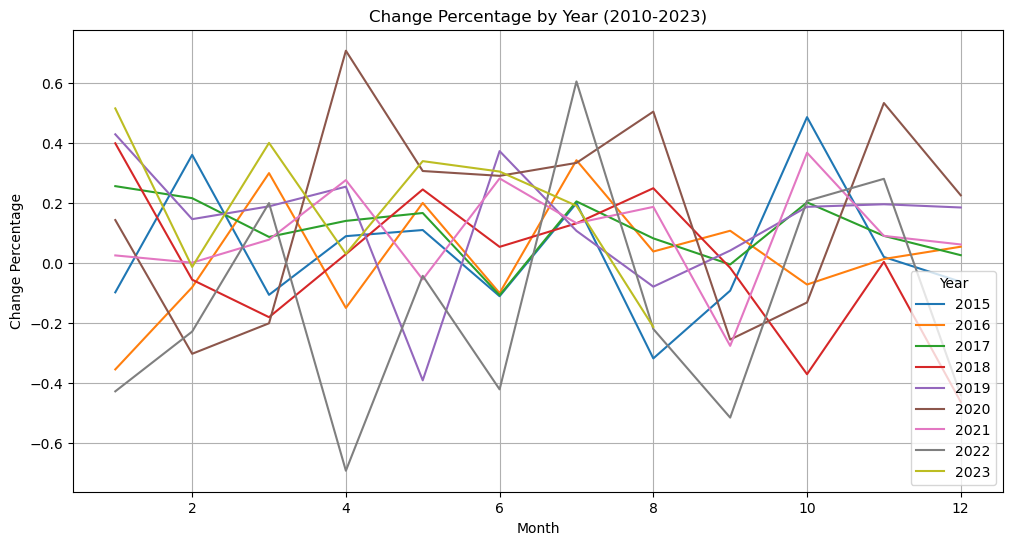

In [47]:
# Plot line charts for each year from 2010 to 2023
years = range(2015, 2024)
fig, ax = plt.subplots(figsize=(12, 6))

for year in years:
    year_data = pivot_table.loc[year]
    ax.plot(year_data.index, year_data.values, label=str(year))

ax.set_xlabel('Month')
ax.set_ylabel('Change Percentage')
ax.set_title('Change Percentage by Year (2010-2023)')
ax.legend(title='Year')
plt.grid(True)
plt.show()

Looking at the percentage average percentage changes each month between 2015 and 2023, July and November consistently experiences increase in value, where as, September consistently experiences decreases in value.

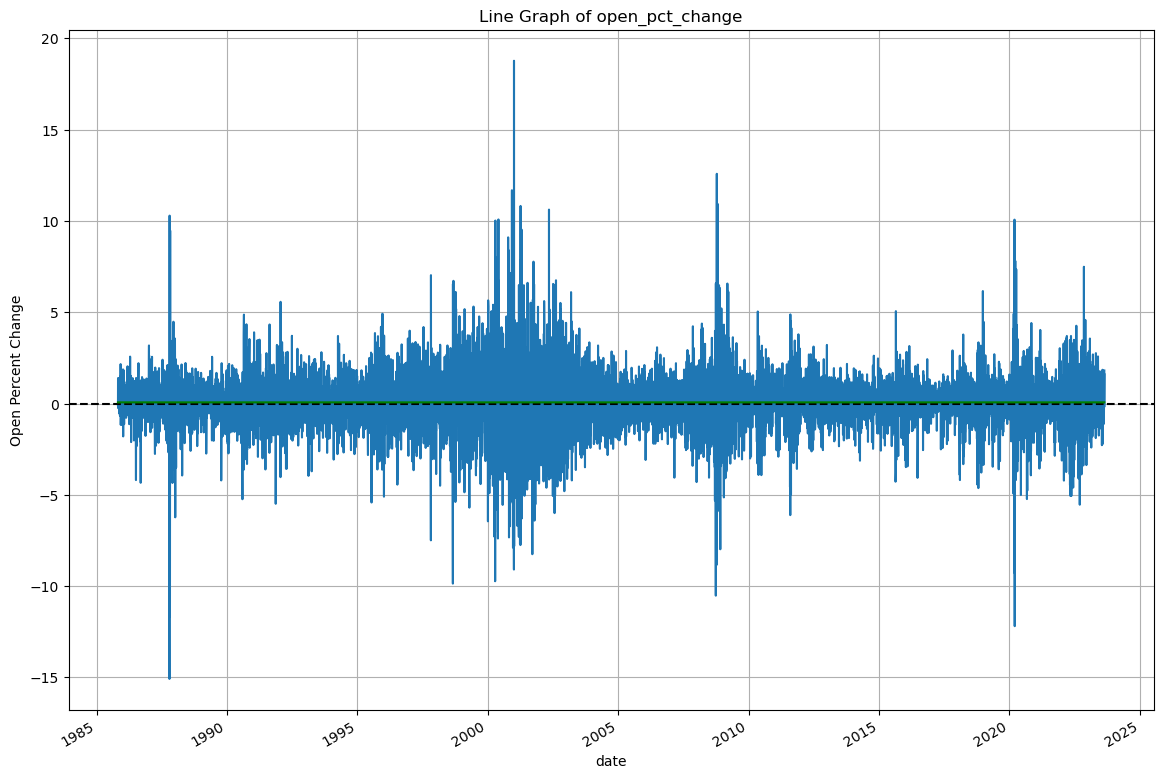

In [48]:
df['change_percent'].plot(kind='line', figsize=(14, 10))
plt.xlabel('date')
plt.ylabel('Open Percent Change')
plt.title('Line Graph of open_pct_change')

# Add a red horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')

# Calculate and plot the line of best fit using the average 'change_percent'
average_change = df['change_percent'].mean()
line_x = df.index
line_y = np.full(len(df), average_change)
plt.plot(line_x, line_y, color='green', label='Average Change Line')

plt.grid(True)
plt.show()

Looking at the Percentage change we can see that is it relatively symmetrical about the y axis, with the average being just above 0 at 0.64%. There is also a higher proportion of large increases, above 10%, than there are decreases.

### Run


In [49]:
df['run'].describe()

count    9532.000000
mean        2.067562
std         1.561272
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: run, dtype: float64

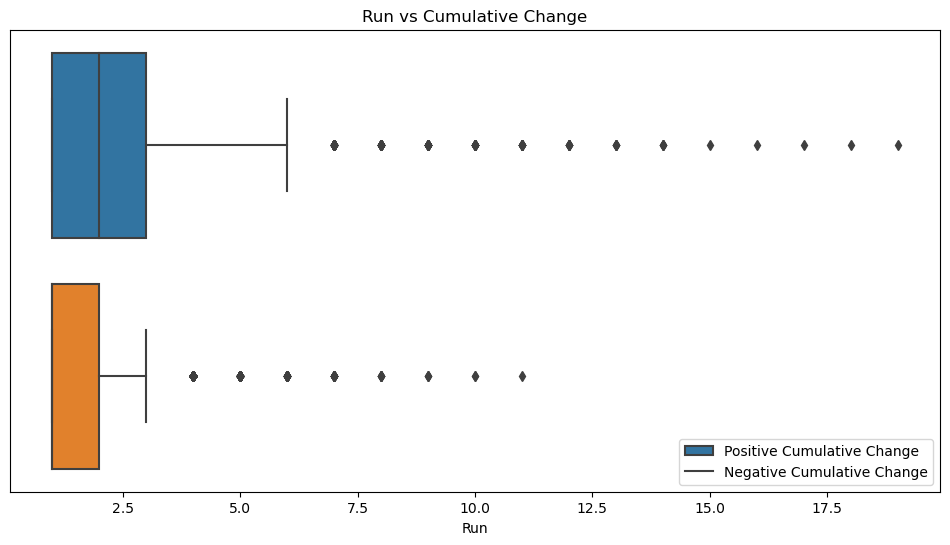

In [50]:
# Filter the data for positive and negative cumulative changes
positive_cumulative_change = df[df['cumulativechange'] >= 0]['run']
negative_cumulative_change = df[df['cumulativechange'] < 0]['run']

# Create a boxplot for 'run' when 'cumulative change' is positive and negative
plt.figure(figsize=(12, 6))
sns.boxplot(data=[positive_cumulative_change, negative_cumulative_change], orient='h')
plt.title('Run vs Cumulative Change')
plt.xlabel('Run')

# Remove y-axis tick labels
plt.yticks([])

# Add a legend
plt.legend(['Positive Cumulative Change', 'Negative Cumulative Change'], loc='lower right')

# Show the boxplots on the same chart with 'run' on the x-axis
plt.show()

Looking at the boxplots we can see the value of the stock is more likely to consecutively increase than decrease with half of all runs lasting for more than 2 days. Conversely, only 1/4 of negative runs last longer than 2 days.

In [51]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                       
1985-10-28  113.91  113.910  113.205  113.820  131460000           -0.08   
1985-10-29  113.82  115.735  113.805  115.400  163400000            1.39   
1985-10-30  115.40  116.125  115.340  115.770  196040000            0.32   
1985-10-31  115.77  116.110  115.155  115.480  169920000           -0.25   
1985-11-01  115.48  116.775  115.480  116.275  180180000            0.69   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   
1985-10-29  159878000.0      114.7700         29    Tuesday  ...   
1985-10-30  161448000.0      115.7325         30  Wednesday  ...   
1985-10-31  162579000.0      115.6325         31   Thursday  ...   
1985-11-01  164193000.0      116.1275          1     Friday  ...   

           monthly_max_to_date  monthly_min_to_date  monthly_avg_to_date  \
date                                                                       
1985-10-28             116.105               106.75           112.160250   
1985-10-29             116.105               106.75           112.284524   
1985-10-30             116.125               106.75           112.441250   
1985-10-31             116.125               106.75           112.580000   
1985-11-01             116.775               115.48           116.127500   

            cumulativechange  run  DecreasingMA5-10  DecreasingMA5-20  \
date                                                                    
1985-10-28            -1.665  2.0                 0                 0   
1985-10-29             1.580  1.0                 0                 0   
1985-10-30             1.950  2.0                 0                 0   
1985-10-31            -0.290  1.0                 0                 0   
1985-11-01             0.795  1.0                 0                 0   

            DecreasingMA10-20  weekly_max_close  weekly_min_close  
date                                                               
1985-10-28                  0                 0                 1  
1985-10-29                  0                 0                 0  
1985-10-30                  0                 0                 0  
1985-10-31                  0                 0                 0  
1985-11-01                  0                 1                 0  

[5 rows x 30 columns]

### Distribution of Change Percentage


In [52]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                       
1985-10-28  113.91  113.910  113.205  113.820  131460000           -0.08   
1985-10-29  113.82  115.735  113.805  115.400  163400000            1.39   
1985-10-30  115.40  116.125  115.340  115.770  196040000            0.32   
1985-10-31  115.77  116.110  115.155  115.480  169920000           -0.25   
1985-11-01  115.48  116.775  115.480  116.275  180180000            0.69   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   
1985-10-29  159878000.0      114.7700         29    Tuesday  ...   
1985-10-30  161448000.0      115.7325         30  Wednesday  ...   
1985-10-31  162579000.0      115.6325         31   Thursday  ...   
1985-11-01  164193000.0      116.1275          1     Friday  ...   

           monthly_max_to_date  monthly_min_to_date  monthly_avg_to_date  \
date                                                                       
1985-10-28             116.105               106.75           112.160250   
1985-10-29             116.105               106.75           112.284524   
1985-10-30             116.125               106.75           112.441250   
1985-10-31             116.125               106.75           112.580000   
1985-11-01             116.775               115.48           116.127500   

            cumulativechange  run  DecreasingMA5-10  DecreasingMA5-20  \
date                                                                    
1985-10-28            -1.665  2.0                 0                 0   
1985-10-29             1.580  1.0                 0                 0   
1985-10-30             1.950  2.0                 0                 0   
1985-10-31            -0.290  1.0                 0                 0   
1985-11-01             0.795  1.0                 0                 0   

            DecreasingMA10-20  weekly_max_close  weekly_min_close  
date                                                               
1985-10-28                  0                 0                 1  
1985-10-29                  0                 0                 0  
1985-10-30                  0                 0                 0  
1985-10-31                  0                 0                 0  
1985-11-01                  0                 1                 0  

[5 rows x 30 columns]

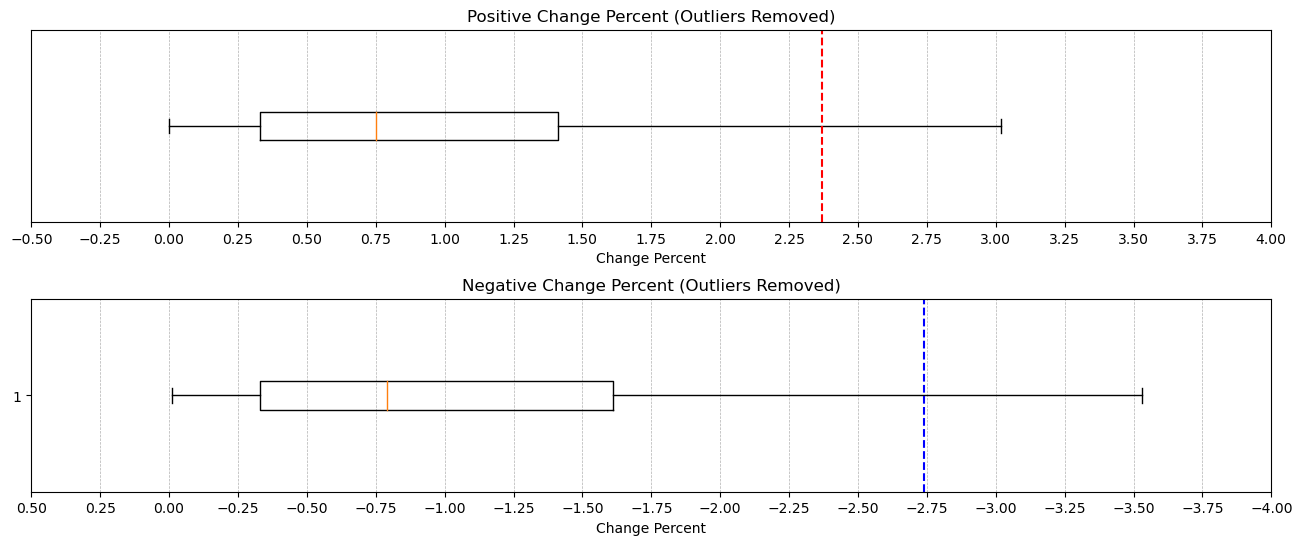

In [53]:
# Filter the data into negative and positive change_percent values
negative_values = df[df['change_percent'] < 0]
positive_values = df[df['change_percent'] >= 0]

# Create subplots for negative and positive values, one above the other
fig, axes = plt.subplots(2, 1, figsize=(16, 6), gridspec_kw={'hspace': 0.4})

# Box plot for positive change_percent values without outliers
positive_box = axes[0].boxplot(positive_values['change_percent'], vert=False, showfliers=False)
axes[0].set_title('Positive Change Percent (Outliers Removed)')
axes[0].set_xlabel('Change Percent')
axes[0].set_xlim(-0.5, 4)  # Set x-axis limits

# Add gridlines to the positive subplot
axes[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5)
axes[0].xaxis.set_major_locator(plt.MultipleLocator(0.25))

# Calculate the 90th percentile value for positive values
positive_90th_percentile = positive_values['change_percent'].quantile(0.90)

# Add a vertical line at the 90th percentile for positive values
axes[0].axvline(positive_90th_percentile, color='red', linestyle='--', label='90th Percentile')

# Box plot for negative change_percent values without outliers with inverted x-axis
negative_box = axes[1].boxplot(negative_values['change_percent'], vert=False, showfliers=False)
axes[1].set_title('Negative Change Percent (Outliers Removed)')
axes[1].set_xlabel('Change Percent')
axes[1].set_xlim(-4, 0.5)  # Set x-axis limits

# Add gridlines to the negative subplot
axes[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5)
axes[1].xaxis.set_major_locator(plt.MultipleLocator(0.25))

# Calculate the 10th percentile value for negative values
negative_10th_percentile = negative_values['change_percent'].quantile(0.10)

# Add a vertical line at the 10th percentile for negative values
axes[1].axvline(negative_10th_percentile, color='blue', linestyle='--', label='10th Percentile')

# Reverse the x-axis for the negative subplot only
axes[1].invert_xaxis()

# Hide the y-axis for the positive subplot
axes[0].get_yaxis().set_visible(False)

# Display the plot
plt.show()

Looking at the distributions for the positive and negative change, we can see that the median negative change is slightly bigger, in absolute value, that the positive change percentage. The negative percentage change also has a larger inter-quartile range, from around 0.3-1.625, compared with 0.3-1.45 in the positive.

This information could be utilized in day trading to predict the likelihood of a stock price continuing in the same trajectory. For example: if the stock price has increased from the open by more than 1.45%, there is only a 25% chance that it will close higher than that.

I have also added lines for each graph at the 90th percentile, meaning there is only a 10% chance that the close price of the stock will continue in the same trajectory - a very strong indicator to buy/sell.

In [54]:
df['change_percent'].describe()

count    9532.000000
mean        0.064988
std         1.653426
min       -15.080000
25%        -0.670000
50%         0.120000
75%         0.840000
max        18.770000
Name: change_percent, dtype: float64

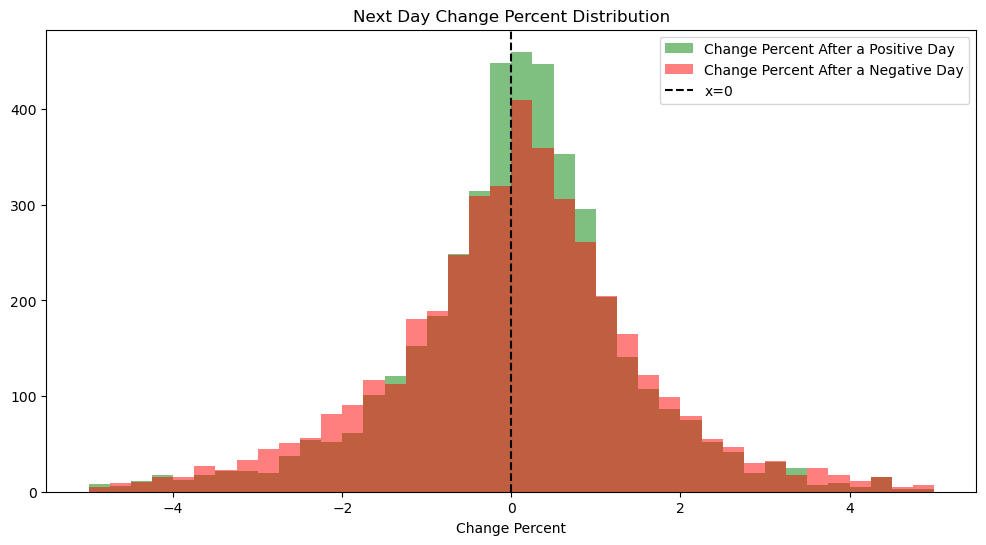

In [55]:
# Calculate the change percentage for the following day
next_day_change = df['change_percent'].shift(-1)

# Calculate the number of data points in the negative group
num_negative_samples = (df['change_percent'] < 0).sum()

# Sample a smaller fraction from the positive data to match the number of negative data points
positive_next_day_changes = next_day_change[(df['change_percent'] >= 0) & (next_day_change >= -5) & (next_day_change <= 5)].sample(n=num_negative_samples, random_state=1)
negative_next_day_changes = next_day_change[(df['change_percent'] < 0) & (next_day_change >= -5) & (next_day_change <= 5)]

# Create a single subplot for both positive and negative change percentages
fig, ax = plt.subplots(figsize=(12, 6))

# Create histograms for the following day's change percentage for positive and negative days without outliers
ax.hist(positive_next_day_changes, bins=40, range=(-5, 5), color='green', alpha=0.5, label='Change Percent After a Positive Day')
ax.hist(negative_next_day_changes, bins=40, range=(-5, 5), color='red', alpha=0.5, label='Change Percent After a Negative Day')

# Add a vertical line at x=0
ax.axvline(x=0, color='black', linestyle='--', label='x=0')

# Set title and labels for the histograms
ax.set_title('Next Day Change Percent Distribution')
ax.set_xlabel('Change Percent')

# Add a legend to distinguish between positive and negative change percentages
ax.legend()

# Display the plot
plt.show()


In [56]:
positive_next_day_changes.count()

4291

In [57]:
negative_next_day_changes.count()

4204

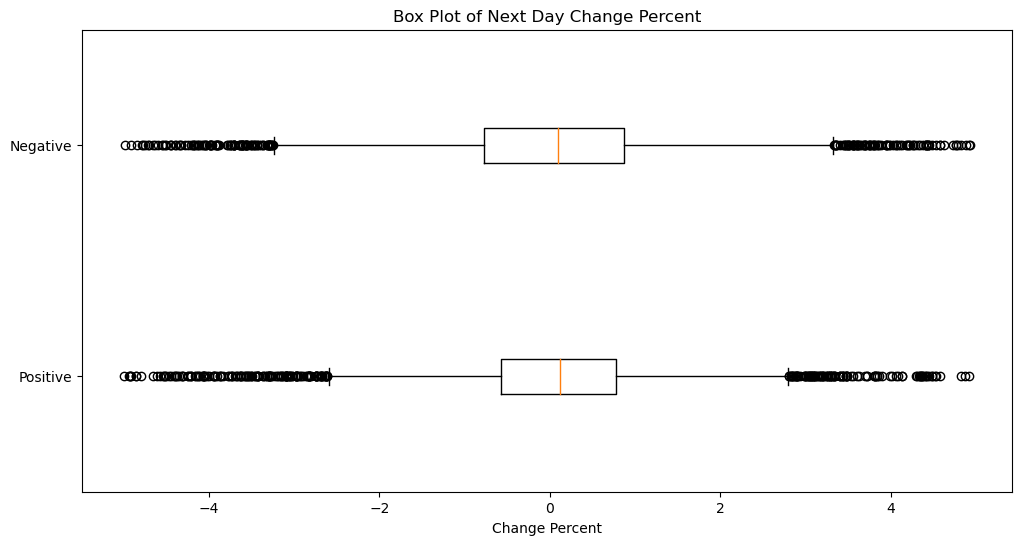

In [58]:
import matplotlib.pyplot as plt

# Create a single subplot for box plots of positive and negative next-day changes
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plots for positive and negative next-day changes
ax.boxplot([positive_next_day_changes, negative_next_day_changes], vert=False, labels=['Positive', 'Negative'])

# Set title and labels for the box plots
ax.set_title('Box Plot of Next Day Change Percent')
ax.set_xlabel('Change Percent')

# Display the plot
plt.show()


Looking at both both the histograms and box plots for the change percentage following either a positive or negative day, we can see they have an almost identical distribution. It it almost perfectly normally distributed, with just a slight shift towards the positive change. 

The  box plots also highlight this, the only difference is both the inter quartile range and overall range for the change percentage following a positive day is smaller than those following a negative day. This implies that prices are slightly more stable when the previous day has been positive compared with a negative day.

However, the main take away from this is that the previous day, in terms of percentage change, has very little use in predictive the next day.

## Modeling Prep

In [59]:
df.drop(columns=['weekly_max_close', 'weekly_min_close'],axis=1, inplace=True)
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change_percent',
       'avg_vol_20d', 'daily_middle', 'dayNumber', 'day', 'month', 'year',
       'is_quarter_end', 'Moving5DayClose', 'Moving10DayClose',
       'Moving20DayClose', 'all_time_high', 'yearly_max_to_date',
       'yearly_min_to_date', 'yearly_avg_to_date', 'monthly_max_to_date',
       'monthly_min_to_date', 'monthly_avg_to_date', 'cumulativechange', 'run',
       'DecreasingMA5-10', 'DecreasingMA5-20', 'DecreasingMA10-20'],
      dtype='object')

In [60]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                       
1985-10-28  113.91  113.910  113.205  113.820  131460000           -0.08   
1985-10-29  113.82  115.735  113.805  115.400  163400000            1.39   
1985-10-30  115.40  116.125  115.340  115.770  196040000            0.32   
1985-10-31  115.77  116.110  115.155  115.480  169920000           -0.25   
1985-11-01  115.48  116.775  115.480  116.275  180180000            0.69   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   
1985-10-29  159878000.0      114.7700         29    Tuesday  ...   
1985-10-30  161448000.0      115.7325         30  Wednesday  ...   
1985-10-31  162579000.0      115.6325         31   Thursday  ...   
1985-11-01  164193000.0      116.1275          1     Friday  ...   

           yearly_min_to_date  yearly_avg_to_date  monthly_max_to_date  \
date                                                                     
1985-10-28             106.75          111.928333              116.105   
1985-10-29             106.75          112.042000              116.105   
1985-10-30             106.75          112.183942              116.125   
1985-10-31             106.75          112.311667              116.125   
1985-11-01             106.75          112.447946              116.775   

            monthly_min_to_date  monthly_avg_to_date  cumulativechange  run  \
date                                                                          
1985-10-28               106.75           112.160250            -1.665  2.0   
1985-10-29               106.75           112.284524             1.580  1.0   
1985-10-30               106.75           112.441250             1.950  2.0   
1985-10-31               106.75           112.580000            -0.290  1.0   
1985-11-01               115.48           116.127500             0.795  1.0   

            DecreasingMA5-10  DecreasingMA5-20  DecreasingMA10-20  
date                                                               
1985-10-28                 0                 0                  0  
1985-10-29                 0                 0                  0  
1985-10-30                 0                 0                  0  
1985-10-31                 0                 0                  0  
1985-11-01                 0                 0                  0  

[5 rows x 28 columns]

The target column needs to be shifted up by 1 place as the model will be aiming to use the data for that day to determine whether the stock should be purchased tomorrow morning - is the stock likely to increase the following day based on the information available today.

In [61]:
df_model = pd.get_dummies(df, columns=['day', 'month'], drop_first=True)


In [62]:
df_model.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change_percent',
       'avg_vol_20d', 'daily_middle', 'dayNumber', 'year', 'is_quarter_end',
       'Moving5DayClose', 'Moving10DayClose', 'Moving20DayClose',
       'all_time_high', 'yearly_max_to_date', 'yearly_min_to_date',
       'yearly_avg_to_date', 'monthly_max_to_date', 'monthly_min_to_date',
       'monthly_avg_to_date', 'cumulativechange', 'run', 'DecreasingMA5-10',
       'DecreasingMA5-20', 'DecreasingMA10-20', 'day_Tuesday', 'day_Wednesday',
       'day_Thursday', 'day_Friday', 'month_February', 'month_March',
       'month_April', 'month_May', 'month_June', 'month_July', 'month_August',
       'month_September', 'month_October', 'month_November', 'month_December'],
      dtype='object')

In [63]:
# Adding a binary target column which will indicate whether "we" should buy the stock at close because it will rise the following day

df_model['target'] = np.where(df_model['open'] < df['close'], 1, 0)
df_model['target'] = df_model['target'].shift(-1)

In [64]:
df_model.dropna(inplace=True)

In [65]:
df_model.to_csv('NAZDAQ-modelling.csv')

In [66]:
df_model.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change_percent',
       'avg_vol_20d', 'daily_middle', 'dayNumber', 'year', 'is_quarter_end',
       'Moving5DayClose', 'Moving10DayClose', 'Moving20DayClose',
       'all_time_high', 'yearly_max_to_date', 'yearly_min_to_date',
       'yearly_avg_to_date', 'monthly_max_to_date', 'monthly_min_to_date',
       'monthly_avg_to_date', 'cumulativechange', 'run', 'DecreasingMA5-10',
       'DecreasingMA5-20', 'DecreasingMA10-20', 'day_Tuesday', 'day_Wednesday',
       'day_Thursday', 'day_Friday', 'month_February', 'month_March',
       'month_April', 'month_May', 'month_June', 'month_July', 'month_August',
       'month_September', 'month_October', 'month_November', 'month_December',
       'target'],
      dtype='object')

## Investment Strategy Analysis

In [67]:
df.head(10)

open     high      low    close     volume  change_percent  \
date                                                                        
1985-10-28  113.910  113.910  113.205  113.820  131460000           -0.08   
1985-10-29  113.820  115.735  113.805  115.400  163400000            1.39   
1985-10-30  115.400  116.125  115.340  115.770  196040000            0.32   
1985-10-31  115.770  116.110  115.155  115.480  169920000           -0.25   
1985-11-01  115.480  116.775  115.480  116.275  180180000            0.69   
1985-11-04  116.275  117.075  115.825  116.040  150680000           -0.20   
1985-11-05  116.040  116.565  115.880  116.440  175360000            0.34   
1985-11-06  116.440  117.620  116.440  117.380  187000000            0.81   
1985-11-07  117.380  117.965  117.380  117.620  177280000            0.20   
1985-11-08  117.620  119.390  117.585  119.260  173520000            1.39   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   
1985-10-29  159878000.0      114.7700         29    Tuesday  ...   
1985-10-30  161448000.0      115.7325         30  Wednesday  ...   
1985-10-31  162579000.0      115.6325         31   Thursday  ...   
1985-11-01  164193000.0      116.1275          1     Friday  ...   
1985-11-04  165295000.0      116.4500          4     Monday  ...   
1985-11-05  166858000.0      116.2225          5    Tuesday  ...   
1985-11-06  168398000.0      117.0300          6  Wednesday  ...   
1985-11-07  169520000.0      117.6725          7   Thursday  ...   
1985-11-08  170285000.0      118.4875          8     Friday  ...   

           yearly_min_to_date  yearly_avg_to_date  monthly_max_to_date  \
date                                                                     
1985-10-28             106.75          111.928333              116.105   
1985-10-29             106.75          112.042000              116.105   
1985-10-30             106.75          112.183942              116.125   
1985-10-31             106.75          112.311667              116.125   
1985-11-01             106.75          112.447946              116.775   
1985-11-04             106.75          112.585948              117.075   
1985-11-05             106.75          112.707167              117.075   
1985-11-06             106.75          112.846613              117.620   
1985-11-07             106.75          112.997422              117.965   
1985-11-08             106.75          113.163788              119.390   

            monthly_min_to_date  monthly_avg_to_date  cumulativechange  run  \
date                                                                          
1985-10-28               106.75           112.160250            -1.665  2.0   
1985-10-29               106.75           112.284524             1.580  1.0   
1985-10-30               106.75           112.441250             1.950  2.0   
1985-10-31               106.75           112.580000            -0.290  1.0   
1985-11-01               115.48           116.127500             0.795  1.0   
1985-11-04               115.48           116.288750            -0.235  1.0   
1985-11-05               115.48           116.266667             0.400  1.0   
1985-11-06               115.48           116.457500             1.340  2.0   
1985-11-07               115.48           116.700500             1.580  3.0   
1985-11-08               115.48           116.998333             3.220  4.0   

            DecreasingMA5-10  DecreasingMA5-20  DecreasingMA10-20  
date                                                               
1985-10-28                 0                 0                  0  
1985-10-29                 0                 0                  0  
1985-10-30                 0                 0                  0  
1985-10-31                 0                 0                  0  
1985-11-01                 

In [68]:
inv_df = df.iloc[:, :4].copy()
inv_df.head(20)


open     high      low    close
date                                          
1985-10-28  113.910  113.910  113.205  113.820
1985-10-29  113.820  115.735  113.805  115.400
1985-10-30  115.400  116.125  115.340  115.770
1985-10-31  115.770  116.110  115.155  115.480
1985-11-01  115.480  116.775  115.480  116.275
1985-11-04  116.275  117.075  115.825  116.040
1985-11-05  116.040  116.565  115.880  116.440
1985-11-06  116.440  117.620  116.440  117.380
1985-11-07  117.380  117.965  117.380  117.620
1985-11-08  117.620  119.390  117.585  119.260
1985-11-11  119.260  120.540  119.180  120.400
1985-11-12  120.390  122.010  120.390  121.820
1985-11-13  121.820  121.915  120.900  121.165
1985-11-14  121.165  121.915  120.800  121.835
1985-11-15  121.835  123.100  121.790  122.175
1985-11-18  122.175  122.280  121.730  121.955
1985-11-19  121.955  122.800  121.735  122.570
1985-11-20  122.570  122.795  122.200  122.200
1985-11-21  122.200  123.805  122.200  123.610
1985-11-22  123.610  124.335  123.445  123.970

In [69]:
# Adding a maximum daily percentage increase column to use for the "perfect investor", creating it as a multiplier
inv_df['low_high_pct_change'] = 1+ ((inv_df['high'] - inv_df['low'])/inv_df['low'])

In [70]:
inv_df.head(20)

open     high      low    close  low_high_pct_change
date                                                               
1985-10-28  113.910  113.910  113.205  113.820             1.006228
1985-10-29  113.820  115.735  113.805  115.400             1.016959
1985-10-30  115.400  116.125  115.340  115.770             1.006806
1985-10-31  115.770  116.110  115.155  115.480             1.008293
1985-11-01  115.480  116.775  115.480  116.275             1.011214
1985-11-04  116.275  117.075  115.825  116.040             1.010792
1985-11-05  116.040  116.565  115.880  116.440             1.005911
1985-11-06  116.440  117.620  116.440  117.380             1.010134
1985-11-07  117.380  117.965  117.380  117.620             1.004984
1985-11-08  117.620  119.390  117.585  119.260             1.015351
1985-11-11  119.260  120.540  119.180  120.400             1.011411
1985-11-12  120.390  122.010  120.390  121.820             1.013456
1985-11-13  121.820  121.915  120.900  121.165             1.008395
1985-11-14  121.165  121.915  120.800  121.835             1.009230
1985-11-15  121.835  123.100  121.790  122.175             1.010756
1985-11-18  122.175  122.280  121.730  121.955             1.004518
1985-11-19  121.955  122.800  121.735  122.570             1.008749
1985-11-20  122.570  122.795  122.200  122.200             1.004869
1985-11-21  122.200  123.805  122.200  123.610             1.013134
1985-11-22  123.610  124.335  123.445  123.970             1.007210

#### "Perfect day Trading"

In [71]:
investment = 100
balance = investment

for index, row in inv_df.iterrows():
    balance = balance * (1 + row['low_high_pct_change'])
    
print(balance)

inf


In [72]:
# Set the initial balance in the first row
inv_df['balance'] = 100.00

# Calculate the 'balance' column based on the previous day's balance
for i in range(1, len(inv_df)):
    inv_df['balance'].iloc[i] = round(inv_df['balance'].iloc[i - 1] * inv_df['low_high_pct_change'].iloc[i], 2)


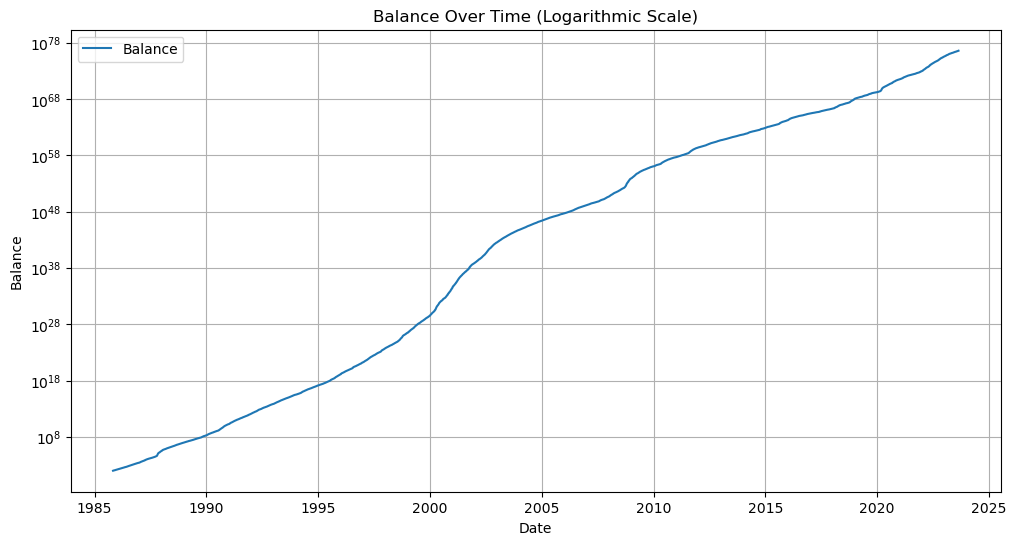

In [73]:
# Assuming `inv_df` is your DataFrame
plt.figure(figsize=(12, 6))
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.plot(inv_df.index, inv_df['balance'], label='Balance')
plt.title('Balance Over Time (Logarithmic Scale)')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.legend()
plt.grid(True)
plt.show()

Looking at the balance of the "perfect investor" we can see that starting with just 100 dollars, and selling at the daily high and purchasing at the next daily low every day, over the course of just under 40 years you would have made 10^76  which is an unfathomably large amount.

In [74]:
balance_exceeds_1m = inv_df[inv_df['balance'] > 1000000]
first_exceeds_1m = balance_exceeds_1m.head(1)
print(first_exceeds_1m[['balance']])
print("in just", first_exceeds_1m.index[0] - inv_df.index[0])


               balance
date                  
1988-04-04  1001010.45
in just 889 days 00:00:00


It only takes 889 days to break $1,000,000 


In [75]:
balance_exceeds_1b = inv_df[inv_df['balance'] > 1000000000]
first_exceeds_1b = balance_exceeds_1b.head(1)
print(first_exceeds_1b[['balance']])
print("in just", first_exceeds_1b.index[0] - inv_df.index[0])

                 balance
date                    
1990-06-07  1.011949e+09
in just 1683 days 00:00:00


More impressively it only takes twice as long, around 5 years, to break $1,000,000,000

In [76]:
inv_df.head()

open     high      low    close  low_high_pct_change  balance
date                                                                       
1985-10-28  113.91  113.910  113.205  113.820             1.006228   100.00
1985-10-29  113.82  115.735  113.805  115.400             1.016959   101.70
1985-10-30  115.40  116.125  115.340  115.770             1.006806   102.39
1985-10-31  115.77  116.110  115.155  115.480             1.008293   103.24
1985-11-01  115.48  116.775  115.480  116.275             1.011214   104.40

#### Buy Monday, sell Friday

In [77]:
# Assuming you hav# Assuming you have a DataFrame named 'inv_df' with a datetime index
inv_df.index = pd.to_datetime(inv_df.index)

# Create a date range that includes all relevant weeks starting on Mondays
start_date = inv_df.index.min()
end_date = inv_df.index.max()
week_range = pd.date_range(start=start_date, end=end_date, freq='W-MON')

# Resample the data to include complete weeks
weekly_data = inv_df.resample('W-MON').agg({'open': 'first', 'close': 'last'})

# Rename the columns
weekly_data = weekly_data.rename(columns={'open': 'Open on Monday', 'close': 'Close on Friday'})


In [78]:
weekly_data['Percentage Change'] = 1 + ((weekly_data['Close on Friday'] - weekly_data['Open on Monday'])/weekly_data['Open on Monday'])

In [79]:
weekly_data.dropna(inplace=True)

In [80]:
# Set the initial balance in the first row
weekly_data['balance'] = 100.00

# Calculate the 'balance' column based on the previous day's balance
for i in range(1, len(weekly_data)):
    weekly_data['balance'].iloc[i] = round(weekly_data['balance'].iloc[i - 1] * weekly_data['Percentage Change'].iloc[i], 2)

In [81]:
weekly_data.tail(20)

Open on Monday  Close on Friday  Percentage Change  balance
date                                                                   
2023-04-17      13040.4902       13087.7100           1.003621  4439.48
2023-04-24      13180.3096       12969.7598           0.984025  4368.56
2023-05-01      12905.0898       13231.4697           1.025291  4479.04
2023-05-08      13225.4805       13291.6396           1.005002  4501.45
2023-05-15      13228.6396       13413.5098           1.013975  4564.36
2023-05-22      13385.3701       13849.7402           1.034692  4722.71
2023-05-29      13773.6797       14298.4102           1.038097  4902.63
2023-06-05      14465.5898       14556.5000           1.006285  4933.44
2023-06-12      14526.0996       14784.2998           1.017775  5021.13
2023-06-19      14911.2598       15083.9199           1.011579  5079.27
2023-06-26      15036.4805       14689.0195           0.976892  4961.90
2023-07-03      14751.5703       15208.6904           1.030988  5115.66
2023-07-10      15165.3604       15045.6396           0.992106  5075.28
2023-07-17      15068.1299       15713.2803           1.042816  5292.58
2023-07-24      15671.7197       15448.0195           0.985726  5217.03
2023-07-31      15483.0596       15757.0000           1.017693  5309.33
2023-08-07      15696.9805       15407.8496           0.981580  5211.53
2023-08-14      15279.4102       15205.5898           0.995169  5186.35
2023-08-21      15172.0801       14936.6904           0.984485  5105.89
2023-08-28      15035.0703       15178.9238           1.009568  5154.74

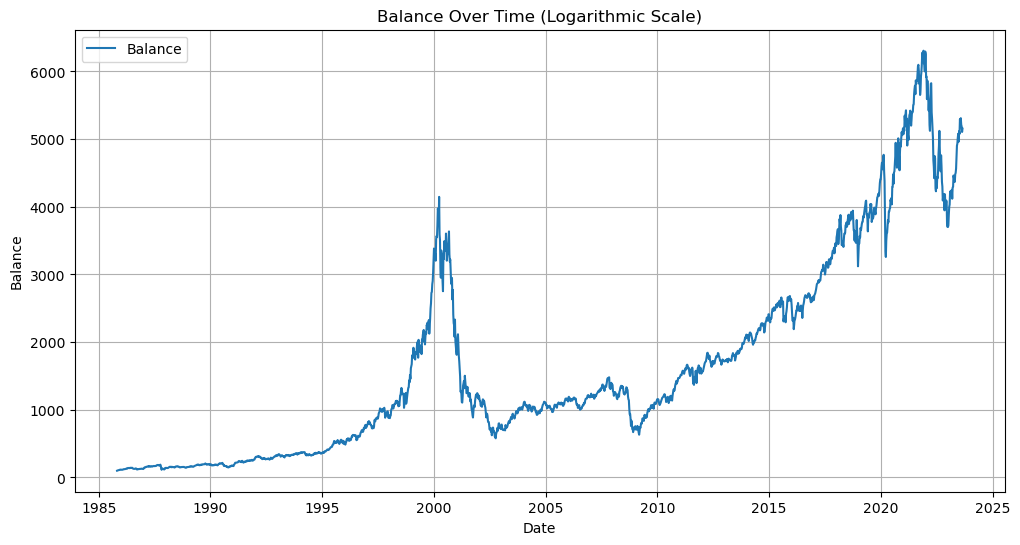

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['balance'], label='Balance')
plt.title('Balance Over Time (Logarithmic Scale)')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.legend()
plt.grid(True)
plt.show()

Buying every Monday open and selling every Friday before close appears at first glance to yield some returns. However, the actual value of the stock is around \\$15000 in 2023. This means that consistently buying and selling has yielded roughly half of the stocks value.

Buying \\$100 worth of the stock on day one (open of \\$113.91) of the data would have given us 87.8\% of a total stock which would be worth $13325.

This means that investing and holding is much more beneficial than buying and selling on the most common low and high days.

#### Dollar Cost Average

In [83]:
df.head()

open     high      low    close     volume  change_percent  \
date                                                                       
1985-10-28  113.91  113.910  113.205  113.820  131460000           -0.08   
1985-10-29  113.82  115.735  113.805  115.400  163400000            1.39   
1985-10-30  115.40  116.125  115.340  115.770  196040000            0.32   
1985-10-31  115.77  116.110  115.155  115.480  169920000           -0.25   
1985-11-01  115.48  116.775  115.480  116.275  180180000            0.69   

            avg_vol_20d  daily_middle  dayNumber        day  ...  \
date                                                         ...   
1985-10-28  159366000.0      113.5575         28     Monday  ...   
1985-10-29  159878000.0      114.7700         29    Tuesday  ...   
1985-10-30  161448000.0      115.7325         30  Wednesday  ...   
1985-10-31  162579000.0      115.6325         31   Thursday  ...   
1985-11-01  164193000.0      116.1275          1     Friday  ...   

           yearly_min_to_date  yearly_avg_to_date  monthly_max_to_date  \
date                                                                     
1985-10-28             106.75          111.928333              116.105   
1985-10-29             106.75          112.042000              116.105   
1985-10-30             106.75          112.183942              116.125   
1985-10-31             106.75          112.311667              116.125   
1985-11-01             106.75          112.447946              116.775   

            monthly_min_to_date  monthly_avg_to_date  cumulativechange  run  \
date                                                                          
1985-10-28               106.75           112.160250            -1.665  2.0   
1985-10-29               106.75           112.284524             1.580  1.0   
1985-10-30               106.75           112.441250             1.950  2.0   
1985-10-31               106.75           112.580000            -0.290  1.0   
1985-11-01               115.48           116.127500             0.795  1.0   

            DecreasingMA5-10  DecreasingMA5-20  DecreasingMA10-20  
date                                                               
1985-10-28                 0                 0                  0  
1985-10-29                 0                 0                  0  
1985-10-30                 0                 0                  0  
1985-10-31                 0                 0                  0  
1985-11-01                 0                 0                  0  

[5 rows x 28 columns]

In [84]:
# Creating a copy of the columns i need and adding a weekday column, extracted from the index
dca = df.iloc[:, :6].copy()
dca['Weekday'] = dca.index.strftime('%A')
dca.head()

open     high      low    close     volume  change_percent  \
date                                                                       
1985-10-28  113.91  113.910  113.205  113.820  131460000           -0.08   
1985-10-29  113.82  115.735  113.805  115.400  163400000            1.39   
1985-10-30  115.40  116.125  115.340  115.770  196040000            0.32   
1985-10-31  115.77  116.110  115.155  115.480  169920000           -0.25   
1985-11-01  115.48  116.775  115.480  116.275  180180000            0.69   

              Weekday  
date                   
1985-10-28     Monday  
1985-10-29    Tuesday  
1985-10-30  Wednesday  
1985-10-31   Thursday  
1985-11-01     Friday

In [85]:
# Dropping the volume column
dca.drop(columns='volume', inplace=True)

In [86]:
dca.head()

open     high      low    close  change_percent    Weekday
date                                                                    
1985-10-28  113.91  113.910  113.205  113.820           -0.08     Monday
1985-10-29  113.82  115.735  113.805  115.400            1.39    Tuesday
1985-10-30  115.40  116.125  115.340  115.770            0.32  Wednesday
1985-10-31  115.77  116.110  115.155  115.480           -0.25   Thursday
1985-11-01  115.48  116.775  115.480  116.275            0.69     Friday

For the purpose of this model, the assumption is that you have purchased the stock at the "open" price.

In [87]:
# Define custom orders for days of the week and months
custom_order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
custom_order_months = [
    'January', 'February', 'March', 'April', 'May',
    'June', 'July', 'August', 'September', 'October',
    'November', 'December'
]

# Convert the 'day' and 'month' columns to categorical data types with custom orders
df['Weekday'] = pd.Categorical(df['day'], categories=custom_order_days, ordered=True)
df['month'] = pd.Categorical(df['month'], categories=custom_order_months, ordered=True)

In [88]:
# Define the initial balance for each weekday
initial_balance = {
    'Monday': 0,
    'Tuesday': 0,
    'Wednesday': 0,
    'Thursday': 0,
    'Friday': 0,
}

# Define the list of weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Calculate weekly returns and update the balance for each weekday
invested_amount = {weekday: 0 for weekday in weekdays}

for date, row in dca.iterrows():
    for weekday in weekdays:
        prev_balance = initial_balance[weekday]
        if date.strftime('%A') == weekday:
            amount_invested = 10
            balance = (prev_balance + amount_invested) * (1 + row['change_percent'] / 100)
            invested_amount[weekday] += amount_invested
        else:
            balance = prev_balance * (1 + row['change_percent'] / 100)
        dca.at[date, f'{weekday}DCABalance'] = balance
        initial_balance[weekday] = balance
dca.head(20)

open     high      low    close  change_percent    Weekday  \
date                                                                        
1985-10-28  113.910  113.910  113.205  113.820           -0.08     Monday   
1985-10-29  113.820  115.735  113.805  115.400            1.39    Tuesday   
1985-10-30  115.400  116.125  115.340  115.770            0.32  Wednesday   
1985-10-31  115.770  116.110  115.155  115.480           -0.25   Thursday   
1985-11-01  115.480  116.775  115.480  116.275            0.69     Friday   
1985-11-04  116.275  117.075  115.825  116.040           -0.20     Monday   
1985-11-05  116.040  116.565  115.880  116.440            0.34    Tuesday   
1985-11-06  116.440  117.620  116.440  117.380            0.81  Wednesday   
1985-11-07  117.380  117.965  117.380  117.620            0.20   Thursday   
1985-11-08  117.620  119.390  117.585  119.260            1.39     Friday   
1985-11-11  119.260  120.540  119.180  120.400            0.96     Monday   
1985-11-12  120.390  122.010  120.390  121.820            1.18    Tuesday   
1985-11-13  121.820  121.915  120.900  121.165           -0.54  Wednesday   
1985-11-14  121.165  121.915  120.800  121.835            0.55   Thursday   
1985-11-15  121.835  123.100  121.790  122.175            0.28     Friday   
1985-11-18  122.175  122.280  121.730  121.955           -0.18     Monday   
1985-11-19  121.955  122.800  121.735  122.570            0.50    Tuesday   
1985-11-20  122.570  122.795  122.200  122.200           -0.30  Wednesday   
1985-11-21  122.200  123.805  122.200  123.610            1.15   Thursday   
1985-11-22  123.610  124.335  123.445  123.970            0.29     Friday   

            MondayDCABalance  TuesdayDCABalance  WednesdayDCABalance  \
date                                                                   
1985-10-28          9.992000           0.000000             0.000000   
1985-10-29         10.130889          10.139000             0.000000   
1985-10-30         10.163308          10.171445            10.032000   
1985-10-31         10.137899          10.146016            10.006920   
1985-11-01         10.207851          10.216024            10.075968   
1985-11-04         20.167435          10.195592            10.055816   
1985-11-05         20.236004          20.264257            10.090006   
1985-11-06         20.399916          20.428397            20.252735   
1985-11-07         20.440716          20.469254            20.293240   
1985-11-08         20.724842          20.753777            20.575316   
1985-11-11         31.019800          20.953013            20.772839   
1985-11-12         31.385834          31.318258            21.017959   
1985-11-13         31.216351          31.149140            30.850462   
1985-11-14         31.388040          31.320460            31.020139   
1985-11-15         31.475927          31.408157            31.106996   
1985-11-18         41.401270          31.351623            31.051003   
1985-11-19         41.608277          41.558381            31.206258   
1985-11-20         41.483452          41.433706            41.082639   
1985-11-21         41.960511          41.910193            41.555090   
1985-11-22         42.082197          42.031733            41.675599   

            ThursdayDCABalance  FridayDCABalance  
date                                              
1985-10-28            0.000000          0.000000  
1985-10-29            0.000000          0.000000  
1985-10-30            0.000000          0.000000  
1985-10-31            9.975000          0.000000  
1985-11-01           10.043828         10.069000  
1985-11-04           10.023740         10.048862  
1985-11-05           10.057821         10.083028  
1985-11-06           10.139289         10.164701  
1985-11-07           20.179567         10.185030  
1985-11-08           20.460063         20.465602  
1985-11-11           20.656480         20.662072  
1985-11-12           20.900227         20.905884  
1985-11-13           

In [89]:
dca.describe().T

count          mean            std      min  \
open                 9532.0   3037.009264    3703.523457  113.820   
high                 9532.0   3062.208619    3731.991518  113.910   
low                  9532.0   3010.430165    3672.846950  113.205   
close                9532.0   3037.716486    3704.320057  113.820   
change_percent       9532.0      0.064988       1.653426  -15.080   
MondayDCABalance     9532.0  79519.118620  102472.742269    9.992   
TuesdayDCABalance    9532.0  85387.105434  110111.967421    0.000   
WednesdayDCABalance  9532.0  84929.991913  109558.041434    0.000   
ThursdayDCABalance   9532.0  83136.261195  107248.340371    0.000   
FridayDCABalance     9532.0  82740.728937  106739.043890    0.000   

                             25%           50%            75%            max  
open                  447.165000   1665.380000    3811.130050   16644.769500  
high                  450.627500   1682.805000    3860.192475   16764.859400  
low                   442.920000   1648.785000    3783.682550   16523.830100  
close                 448.102500   1665.504900    3811.197475   16573.339800  
change_percent         -0.670000      0.120000       0.840000      18.770000  
MondayDCABalance     9175.612917  40926.425180   97097.269949  453101.924559  
TuesdayDCABalance    9827.917759  43916.924455  104172.049052  486801.032821  
WednesdayDCABalance  9762.061798  43651.286346  103583.257281  484316.516167  
ThursdayDCABalance   9557.279253  42728.531986  101400.921618  474119.679171  
FridayDCABalance     9499.776015  42534.782656  100937.147088  471862.176184

In [90]:
import plotly.express as px

# Define the days of the week you want to plot
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Create a figure
fig = px.line(dca, x=dca.index, y=[f'{weekday}DCABalance' for weekday in weekdays],
              labels={'x': 'Date', 'y': 'Balance'}, title='Weekly DCA Balances')

# Customize the layout, e.g., x-axis label rotation
fig.update_layout(xaxis=dict(tickangle=45))

# Show the plot
fig.show()

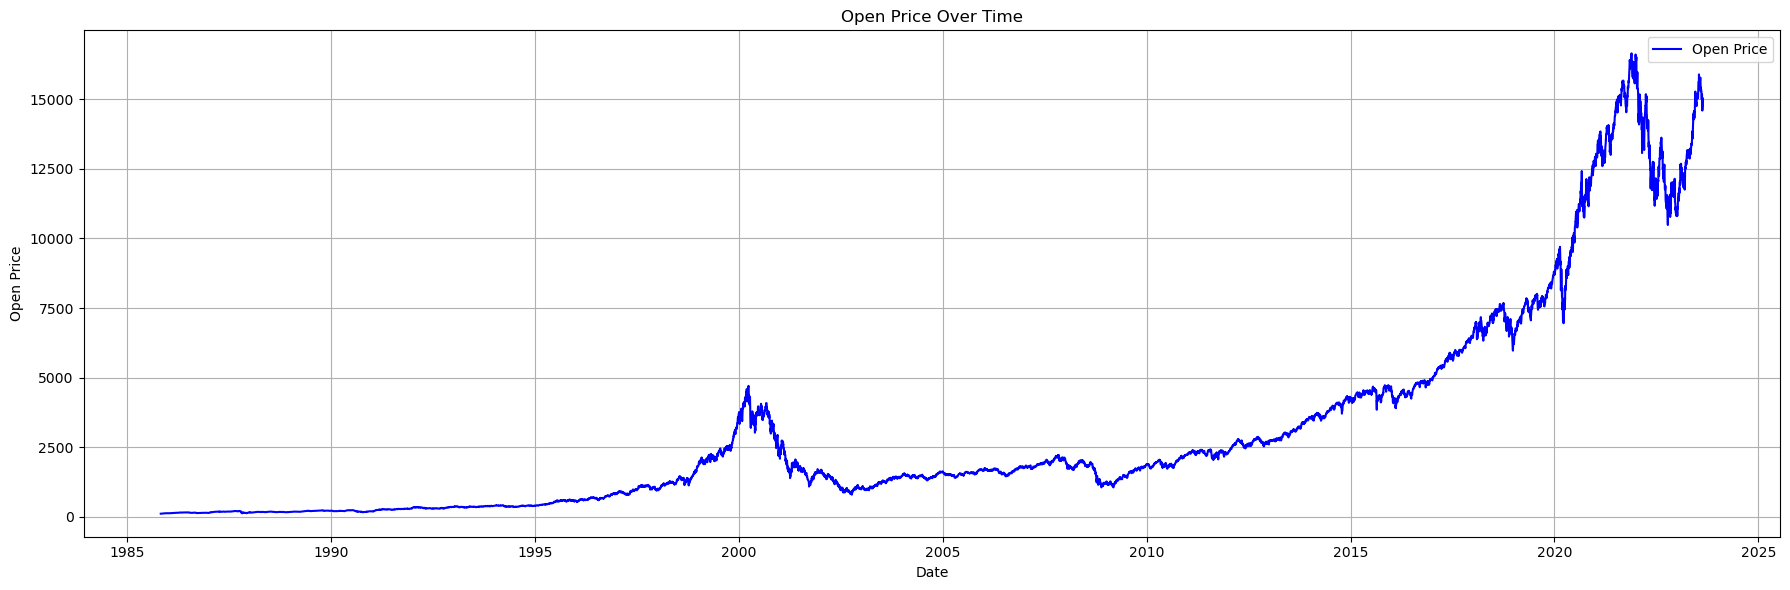

In [91]:
dates = dca.index
open_prices = dca['open']

# Create a line chart
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
plt.plot(dates, open_prices, label='Open Price', color='blue')

# Customize the plot
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Looking at the graph of the balances for each investment day we can see they all follow a near identical path to the stock value of the same period. There are some larger differences present in the value of each investment day towards the end of the time period with Wednesday and Tuesday having the highets value and Monday and Friday being the lowest. This could suggest that Wednesday is the best day to dollar cost average.

In [92]:
# Create a dictionary to store final balances and total invested values
results = {'Weekday': weekdays, 'Final Balance': [], 'Total Invested Value': []}

# Calculate the final balances and total invested values
for weekday in weekdays:
    # Filter the rows for the specific weekday
    weekday_rows = dca[dca['Weekday'] == weekday]
    
    # Extract the final balance from the last row
    final_balance = weekday_rows[f'{weekday}DCABalance'].iloc[-1]
    
    # Calculate the total invested value for this weekday
    total_invested_value = weekday_rows.shape[0] * amount_invested
    
    results['Final Balance'].append(final_balance)
    results['Total Invested Value'].append(total_invested_value)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Set the "Weekday" column as the index
results_df.set_index('Weekday', inplace=True)

# Round the columns to two decimal places
results_df = results_df.round(2)
results_df['Return Rate'] = (results_df['Final Balance'] / results_df['Total Invested Value']).apply(lambda x: f'{x:.2%}')
results_df

Final Balance  Total Invested Value Return Rate
Weekday                                                   
Monday         409127.92                 17990    2274.20%
Tuesday        438787.40                 19550    2244.44%
Wednesday      444465.01                 19540    2274.64%
Thursday       421815.55                 19190    2198.10%
Friday         419214.87                 19050    2200.60%

Looking at the Final balances we can see that Wednesday and Tuesday do yield the highest final balance. However, this is not entirely due to the stock performing better on those days. We can see that Monday has a much lower amount invested. This is due to the stock market being close on Monday's for public Holidays which, over the course of 38 years, results in 156 fewer investment days. When we look at the Return rate for each Investment day, we can see that Monday and Wednesday perform almost identically. Thursday is the "worst" day to invest and yields the lowest relative returns. 

In [93]:
# Filter positive and negative 'change_percent' values
positive_changes = dca[dca['change_percent'] > 0]
negative_changes = dca[dca['change_percent'] < 0]

# Group the positive and negative changes by 'Weekday' and count the occurrences
positive_counts = positive_changes.groupby('Weekday').size()
negative_counts = negative_changes.groupby('Weekday').size()

# If some weekdays have no positive or negative changes, you can fill them with zeros
positive_counts = positive_counts.reindex(dca['Weekday'].unique(), fill_value=0)
negative_counts = negative_counts.reindex(dca['Weekday'].unique(), fill_value=0)

# Print the counts
print("Positive Change Counts by Weekday:")
print(positive_counts)

print("\nNegative Change Counts by Weekday:")
print(negative_counts)

Positive Change Counts by Weekday:
Weekday
Monday        965
Tuesday      1046
Wednesday    1128
Thursday     1052
Friday        998
dtype: int64

Negative Change Counts by Weekday:
Weekday
Monday       823
Tuesday      904
Wednesday    815
Thursday     852
Friday       897
dtype: int64


Looking at the number of positive days compared to negative days, we can see that Wednesday is the "best" in both regards with around 30% more positive days compared to negative. Friday is the worst in this respect with only 11% more positive days compared to negative. Monday has the fewest but as previously discussed this is due to a lower number of total investment days.

In [94]:
# Group the positive and negative changes by 'Weekday' and find the average
positive_mean = positive_changes.groupby('Weekday')['change_percent'].mean().sort_values(ascending=False)
negative_mean = negative_changes.groupby('Weekday')['change_percent'].mean().sort_values(ascending=False)

# Print the counts
print("Average Positive Change by Weekday:")
print(positive_mean)

print("\n Average Negative Change by Weekday:")
print(negative_mean)

Average Positive Change by Weekday:
Weekday
Tuesday      1.145373
Thursday     1.130067
Wednesday    1.101658
Monday       1.081368
Friday       1.006874
Name: change_percent, dtype: float64

 Average Negative Change by Weekday:
Weekday
Friday      -1.115262
Wednesday   -1.139043
Tuesday     -1.170122
Thursday    -1.206538
Monday      -1.268530
Name: change_percent, dtype: float64


When we look at the averages, they tell more of the story. Friday is the most stable day as it has the smallest relative changes both in a positive or negative direction, Thursday is the most volatile. Interestingly, Monday has the largest average negative % change of all days and the second worst Positive days. However, this does not have a negative impact on the rate of return.